In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

from desc import set_device
set_device("gpu")

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [3]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *
from desc.io import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *
from desc.particles import *
from diffrax import *

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic
from desc.compute.data_index import register_compute_fun
from desc.optimize.utils import solve_triangular_regularized

print_backend_info()

DESC version=0.16.0+30.g7ff489646.dirty.
Using JAX backend: jax version=0.6.2, jaxlib version=0.6.2, dtype=float64.
Using device: NVIDIA GeForce RTX 4080 Laptop GPU (id=0), with 10.88 GB available memory.


In [4]:
eq = get("precise_QA")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)

Either checkout to `yge/check-step-directions` or,
need to add couple lines to ``desc/optimize/least_squares.py``:

```python
    import matplotlib.pyplot as plt
    from desc.backend import put

    objective = options.pop("objective", None)
    thing_eq = options.pop("eq", None)
    step = 0

    ...

    if objective:
        dx_direction = put(
            jnp.zeros(thing_eq.dim_x),
            objective._unfixed_idx,
            objective._Z @ step,
        )
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].plot(dx_direction)
        size_total = 0
        # Add vertical lines to divide up the horizontal axis into parameters
        for key, value in thing_eq.params_dict.items():
            size = value.size
            size_total += size
            axes[0].axvline(x=size_total, color="r", linestyle="--")
        axes[0].set_title("dx_direction")
        axes[1].plot(step)
        axes[1].set_title("step")
        axes[2].plot(step_h)
        axes[2].set_title("step_h")
        fig.suptitle(
            f"Accepted step at i={iteration+1}, step_norm={jnp.linalg.norm(dx_direction):.2e}, tr={trust_radius:.2e}"
        )
        plt.show()

```

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 62.2 ms
Timer: Objective build = 71.5 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 139 ms
Timer: LinearConstraintProjection build = 283 ms
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 610 ms

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : qr
Initial Trust Rad

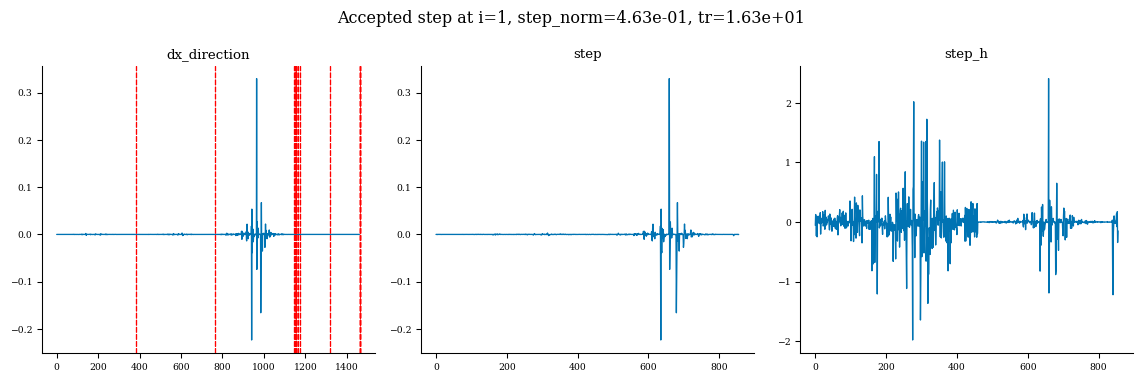

       1              3          2.628e-01      3.619e+00      4.631e-01      2.541e-01   


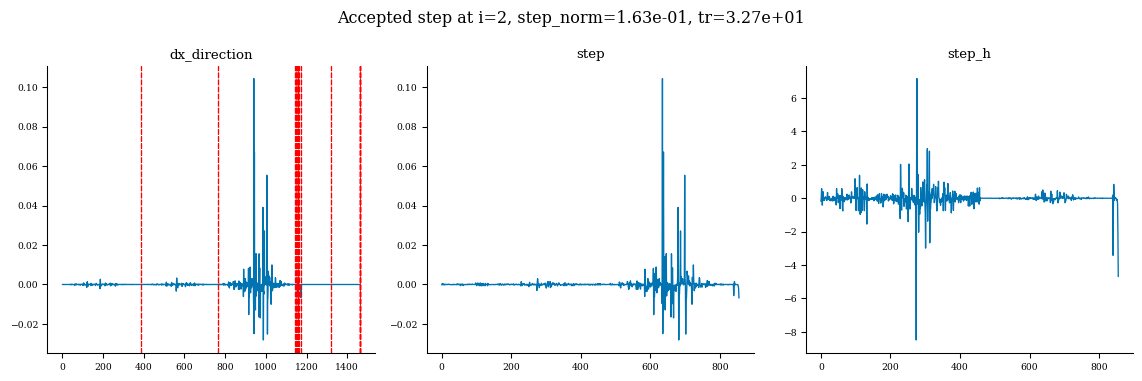

       2              4          4.896e-03      2.579e-01      1.628e-01      3.525e-02   


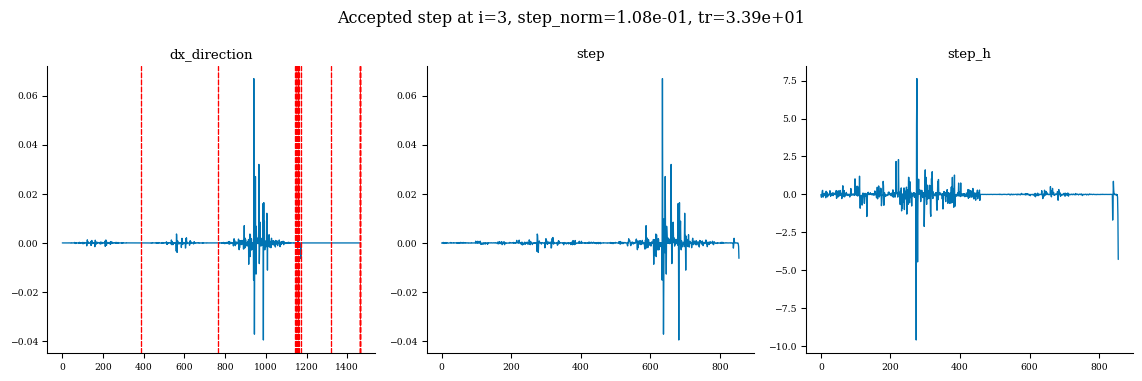

       3              5          4.323e-04      4.464e-03      1.079e-01      7.681e-03   


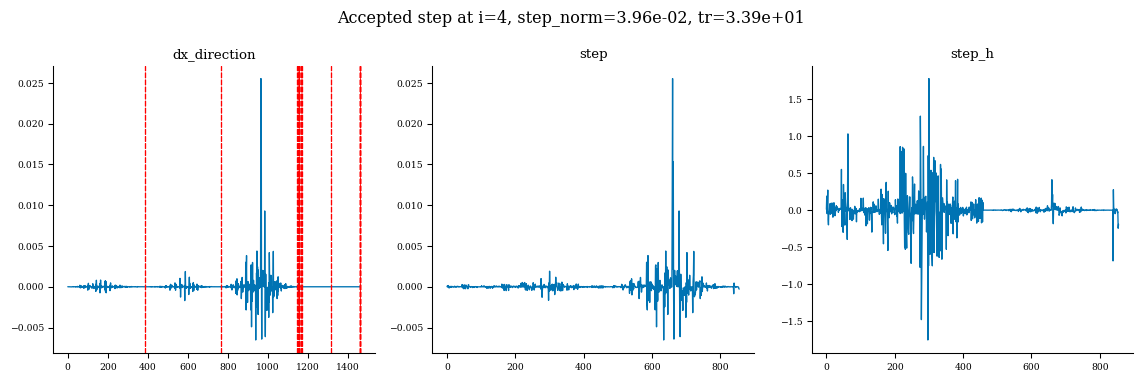

       4              6          2.657e-05      4.057e-04      3.956e-02      1.852e-03   


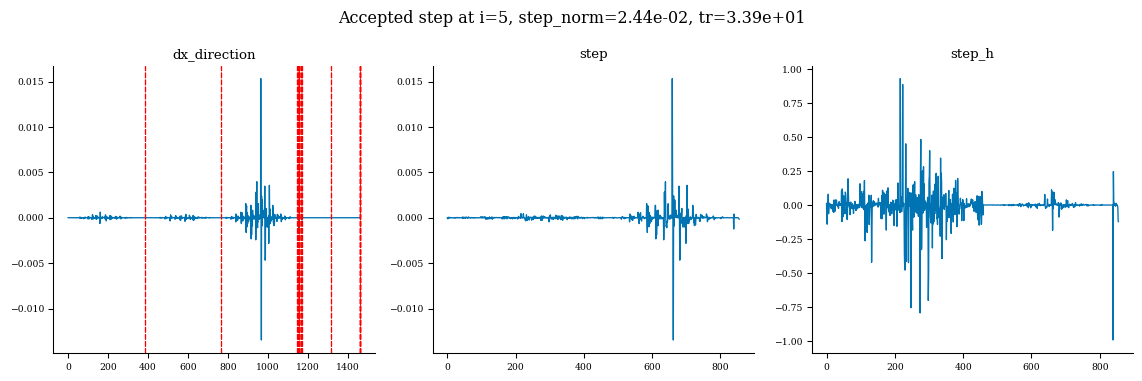

       5              7          1.897e-06      2.467e-05      2.443e-02      4.697e-04   


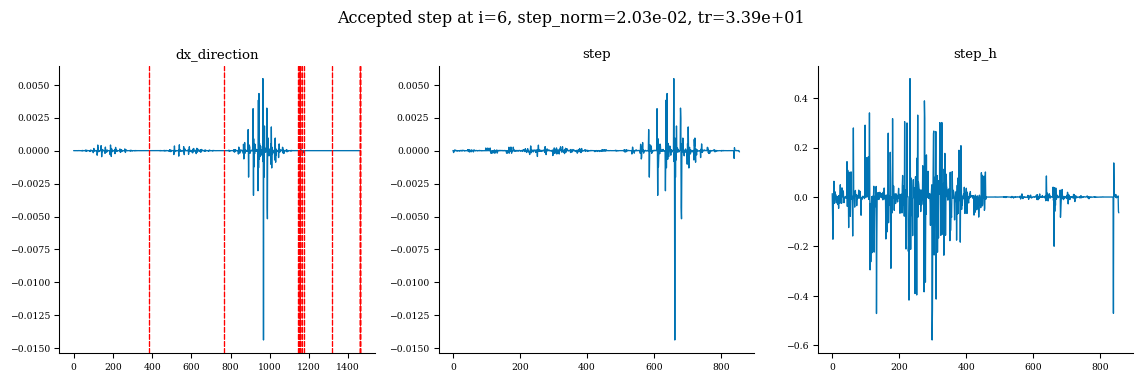

       6              8          8.819e-07      1.015e-06      2.026e-02      4.033e-04   


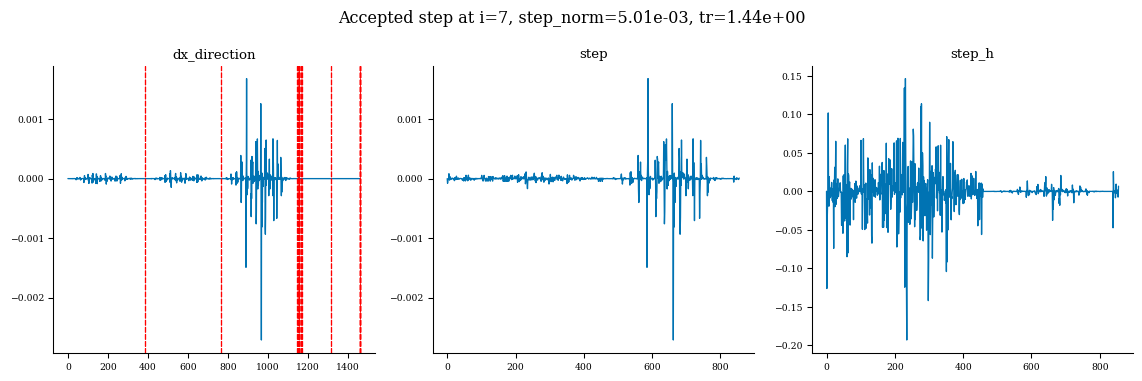

       7             10          1.412e-08      8.678e-07      5.007e-03      4.321e-05   


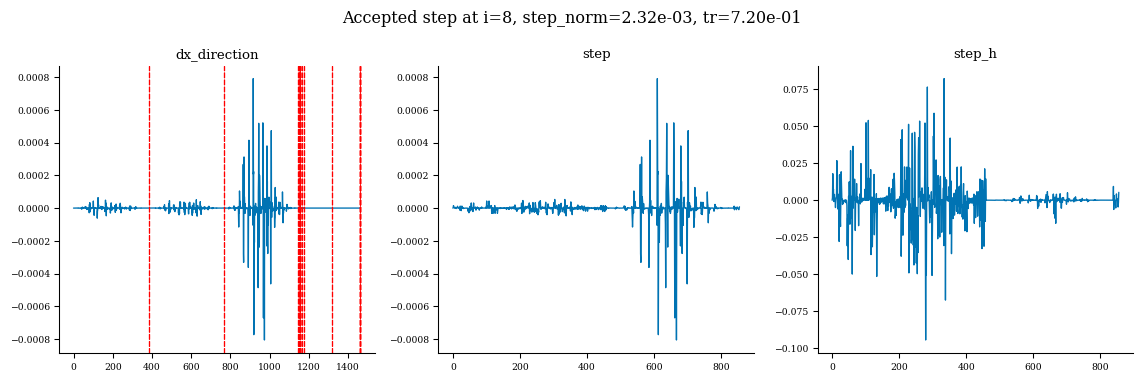

       8             12          2.595e-09      1.153e-08      2.318e-03      9.806e-06   


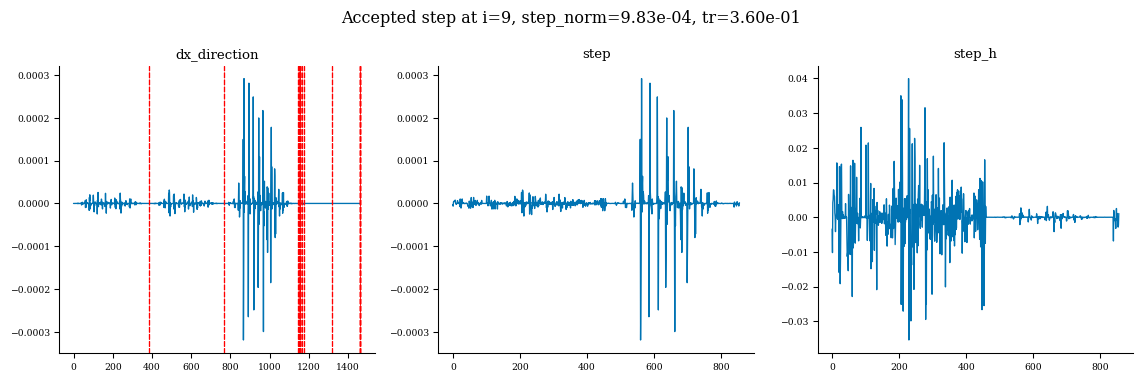

       9             14          1.708e-09      8.874e-10      9.830e-04      3.723e-06   


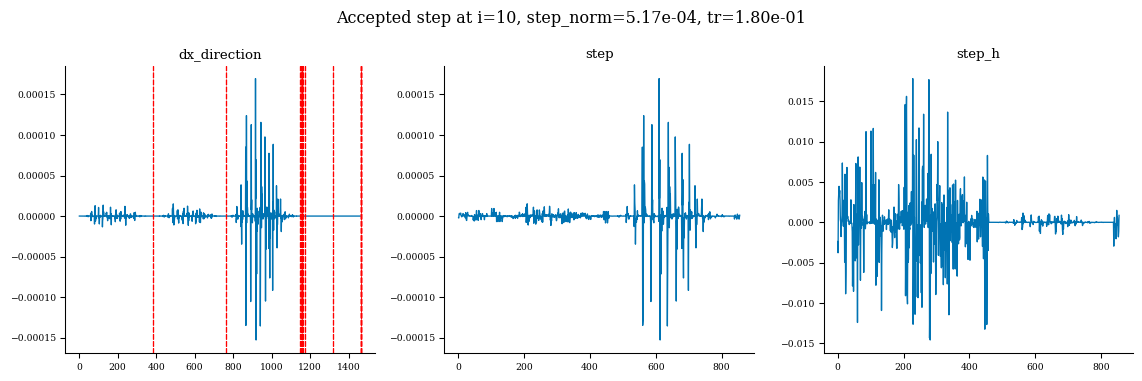

      10             16          1.644e-09      6.384e-11      5.172e-04      5.570e-07   
         Current function value: 1.644e-09
         Total delta_x: 4.036e-01
         Iterations: 10
         Function evaluations: 16
         Jacobian evaluations: 11
Timer: Solution time = 16.0 sec
Timer: Avg time per step = 1.46 sec
                                                                 Start  -->   End
Total (sum of squares):                                      3.882e+00  -->   1.644e-09, 
Maximum absolute Force error:                                9.021e+05  -->   2.404e+01 (N)
Minimum absolute Force error:                                2.656e+00  -->   4.020e-05 (N)
Average absolute Force error:                                3.550e+04  -->   8.547e-01 (N)
Maximum absolute Force error:                                8.273e-01  -->   2.205e-05 (normalized)
Minimum absolute Force error:                                2.436e-06  -->   3.687e-11 (normalized)
Average absolute Force

In [5]:
eq, out = eq.solve(
    maxiter=10, verbose=3, ftol=1e-3, options={"objective": lcp, "eq": eq}
)

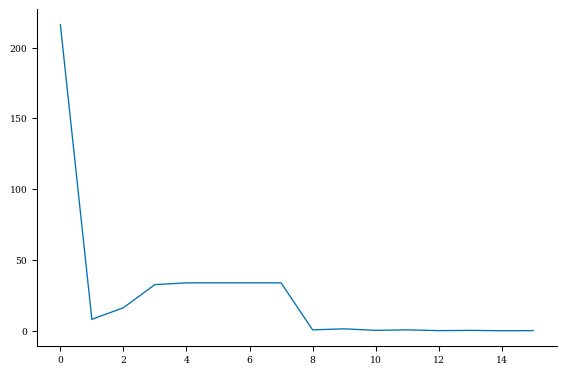

In [6]:
plt.plot(out["alltr"])

# With ESS Scaling

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 63.9 ms
Timer: Objective build = 74.4 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 137 ms
Timer: LinearConstraintProjection build = 2.00 sec
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 2.47 sec

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : qr
Initial Trust

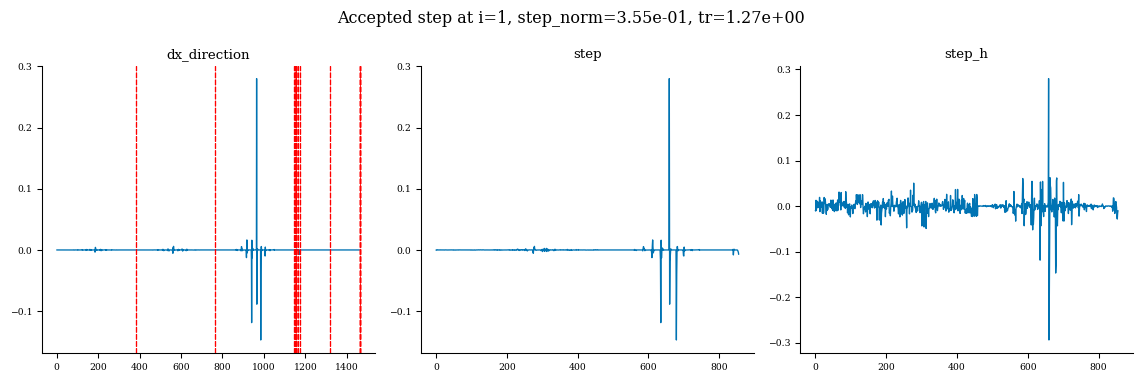

       1              2          4.391e-01      3.443e+00      3.547e-01      2.195e+02   


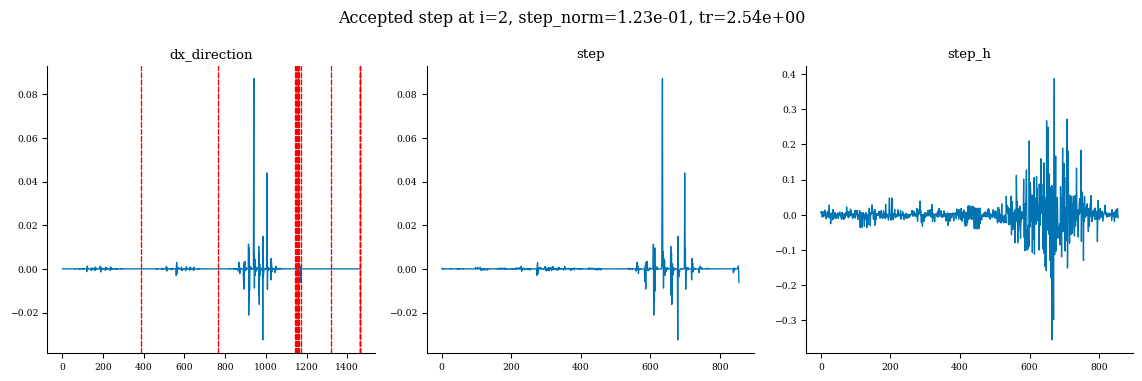

       2              3          1.093e-02      4.281e-01      1.227e-01      2.928e+01   


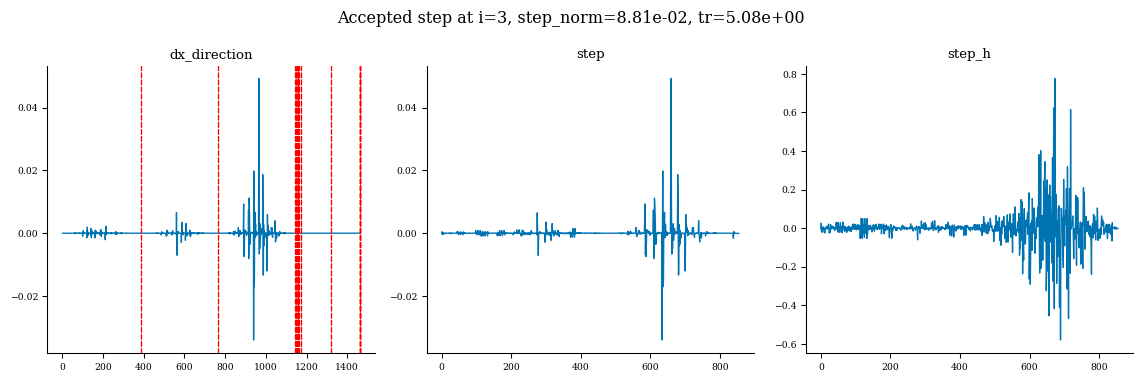

       3              4          1.263e-03      9.663e-03      8.807e-02      4.632e+00   


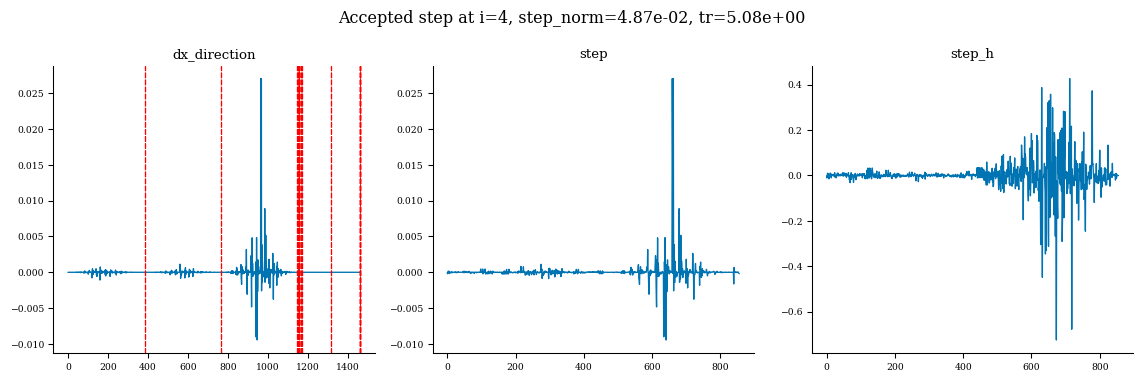

       4              5          1.057e-05      1.252e-03      4.867e-02      4.295e-01   


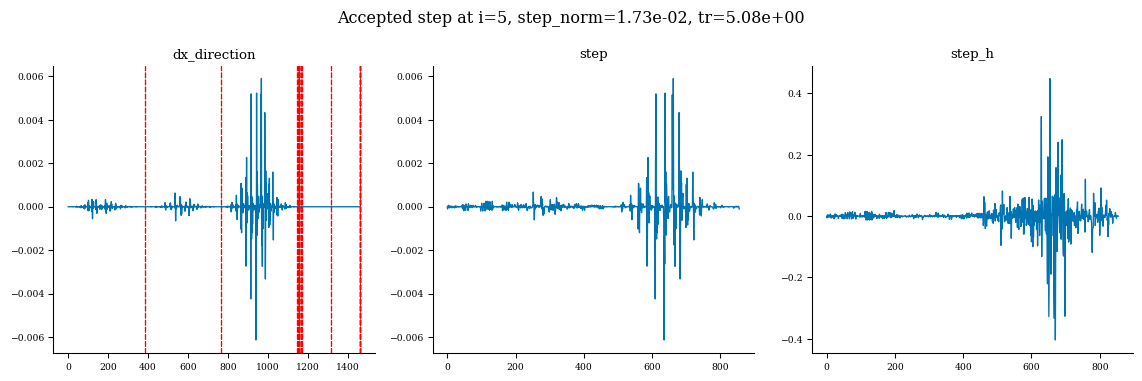

       5              6          1.872e-06      8.694e-06      1.732e-02      2.924e-01   


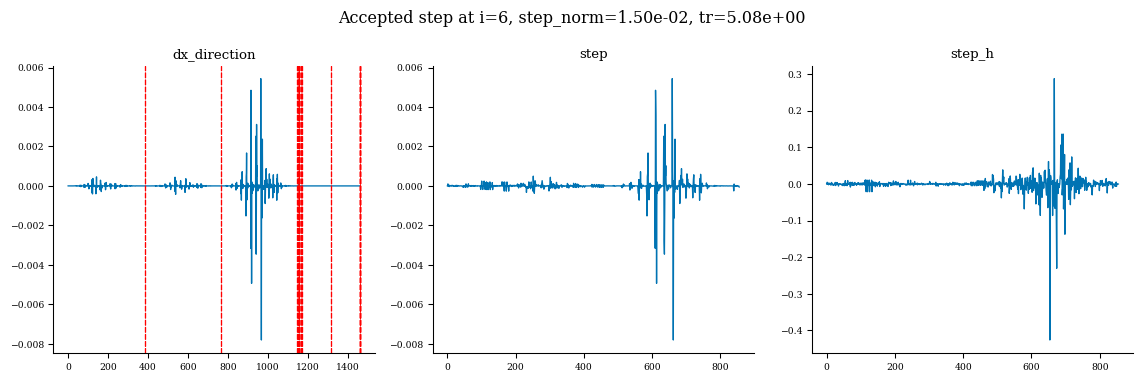

       6              7          5.481e-07      1.324e-06      1.501e-02      1.070e-01   


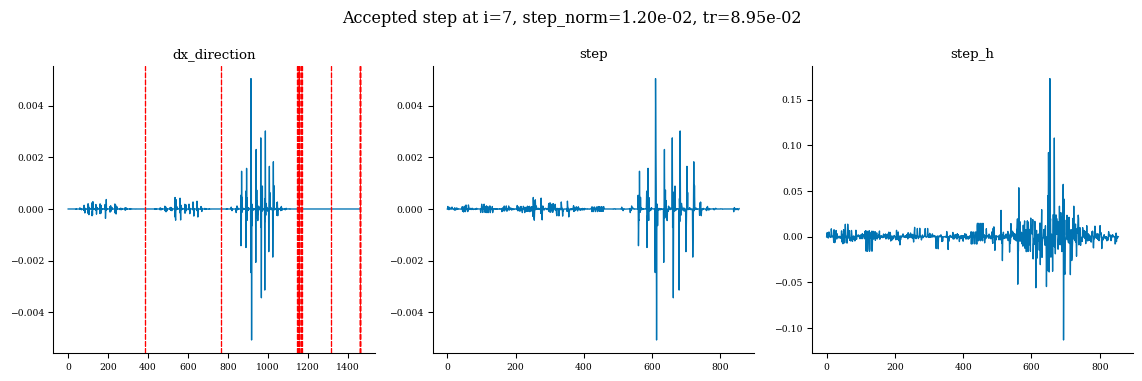

       7              8          5.350e-07      1.303e-08      1.200e-02      2.679e-01   


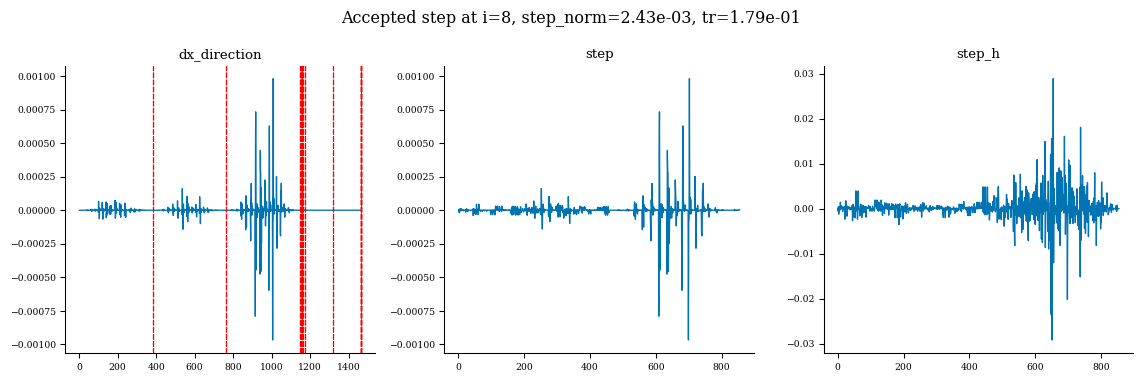

       8              9          3.492e-09      5.315e-07      2.433e-03      2.322e-02   


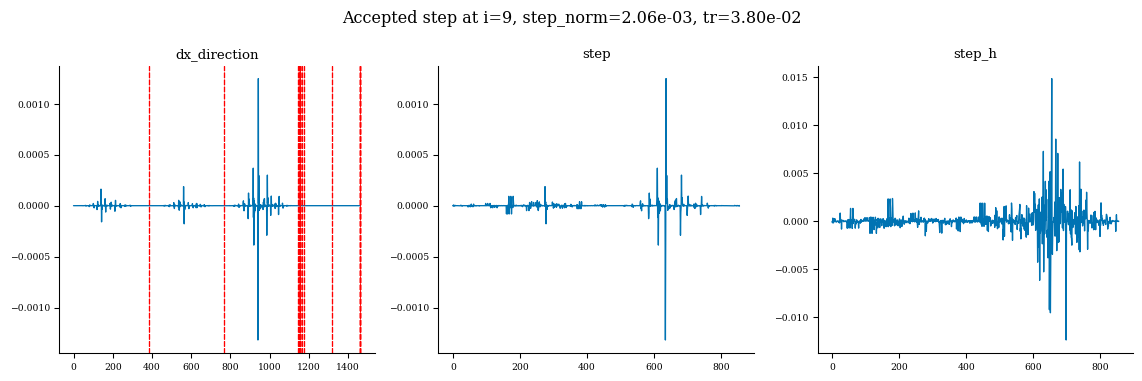

       9             11          2.059e-09      1.433e-09      2.061e-03      8.324e-03   


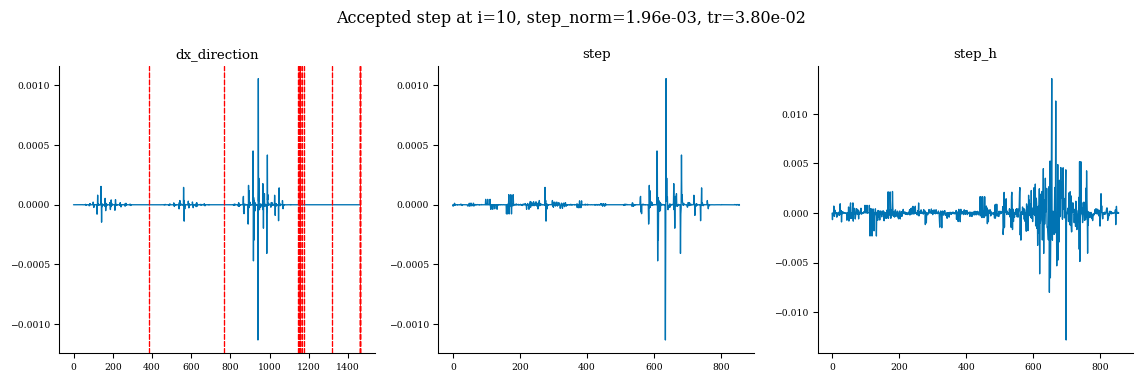

      10             12          1.883e-09      1.764e-10      1.958e-03      3.555e-03   
         Current function value: 1.883e-09
         Total delta_x: 4.054e-01
         Iterations: 10
         Function evaluations: 12
         Jacobian evaluations: 11
Timer: Solution time = 12.2 sec
Timer: Avg time per step = 1.11 sec
                                                                 Start  -->   End
Total (sum of squares):                                      3.882e+00  -->   1.883e-09, 
Maximum absolute Force error:                                9.021e+05  -->   2.318e+01 (N)
Minimum absolute Force error:                                2.656e+00  -->   2.659e-04 (N)
Average absolute Force error:                                3.550e+04  -->   9.160e-01 (N)
Maximum absolute Force error:                                8.273e-01  -->   2.126e-05 (normalized)
Minimum absolute Force error:                                2.436e-06  -->   2.439e-10 (normalized)
Average absolute Force

In [7]:
eq = get("precise_QA")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10, verbose=3, ftol=1e-3, x_scale="ess", options={"objective": lcp, "eq": eq}
)

# With Cholesky

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 64.7 ms
Timer: Objective build = 74.5 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 138 ms
Timer: LinearConstraintProjection build = 201 ms
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 443 ms

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : cho
Initial Trust Ra

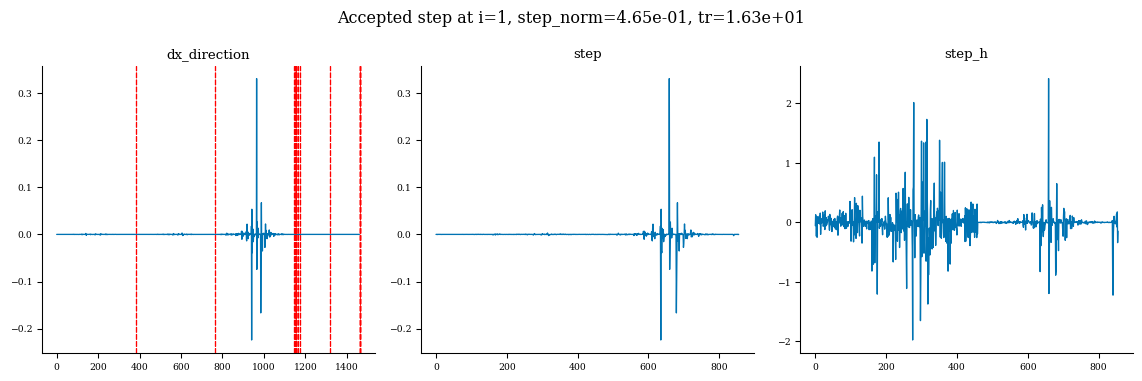

       1              3          2.626e-01      3.619e+00      4.645e-01      2.524e-01   


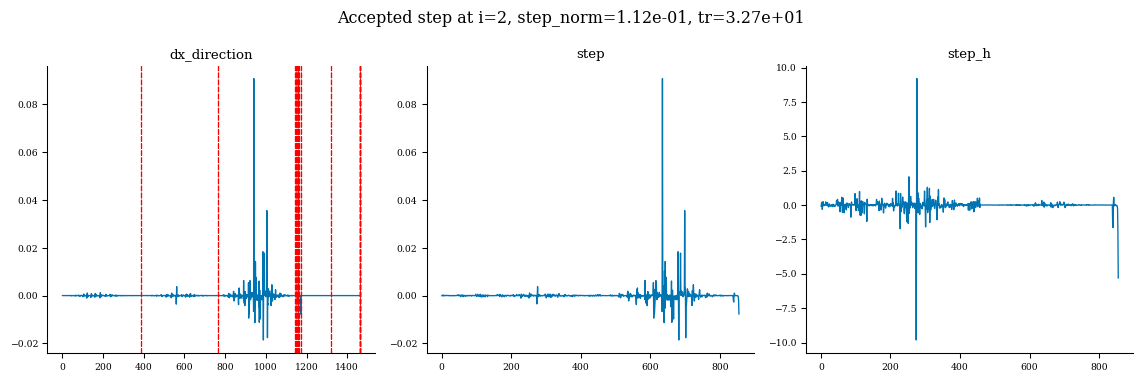

       2              4          6.338e-02      1.993e-01      1.118e-01      1.150e-01   


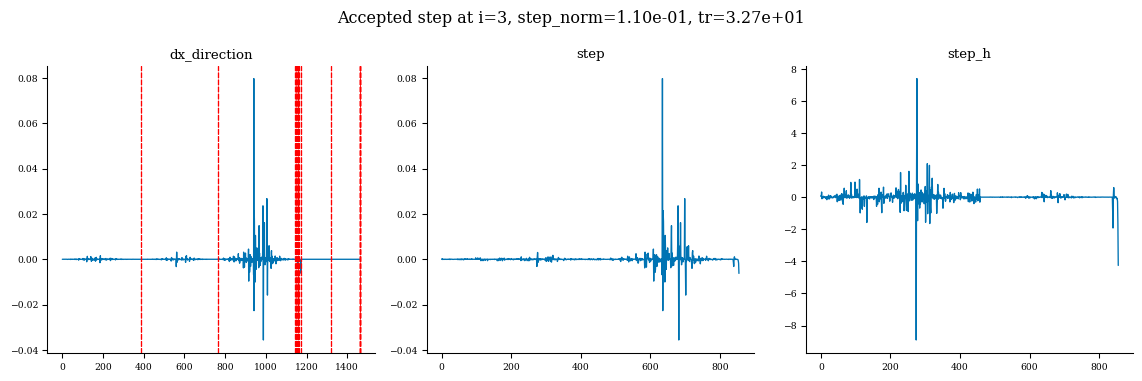

       3              5          8.983e-04      6.248e-02      1.100e-01      1.678e-02   


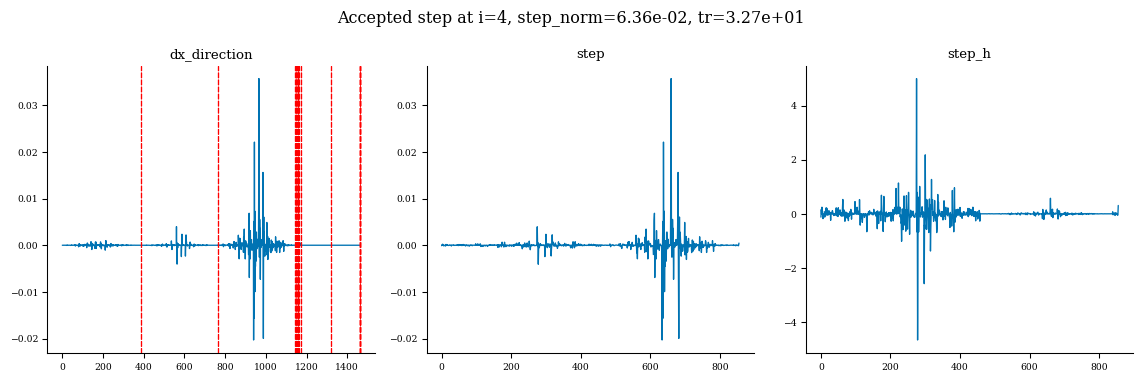

       4              6          1.578e-04      7.405e-04      6.361e-02      5.899e-03   


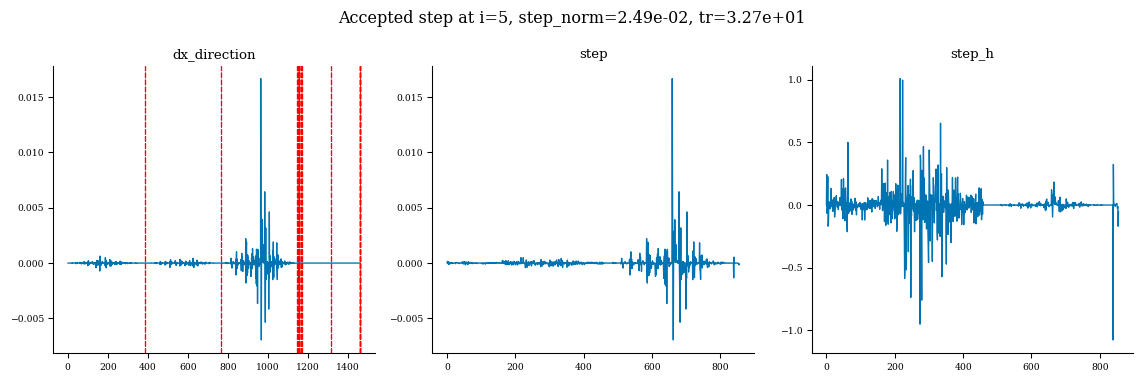

       5              7          2.991e-06      1.548e-04      2.485e-02      5.717e-04   


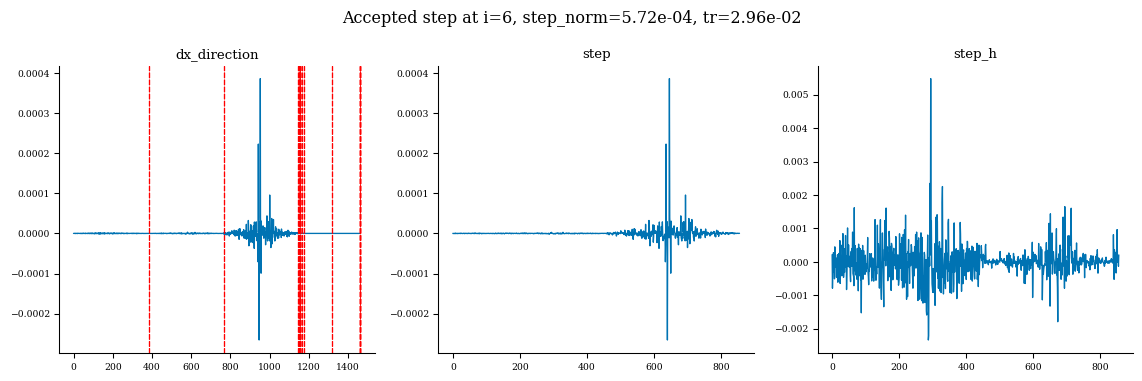

       6             12          1.063e-07      2.884e-06      5.715e-04      6.096e-05   


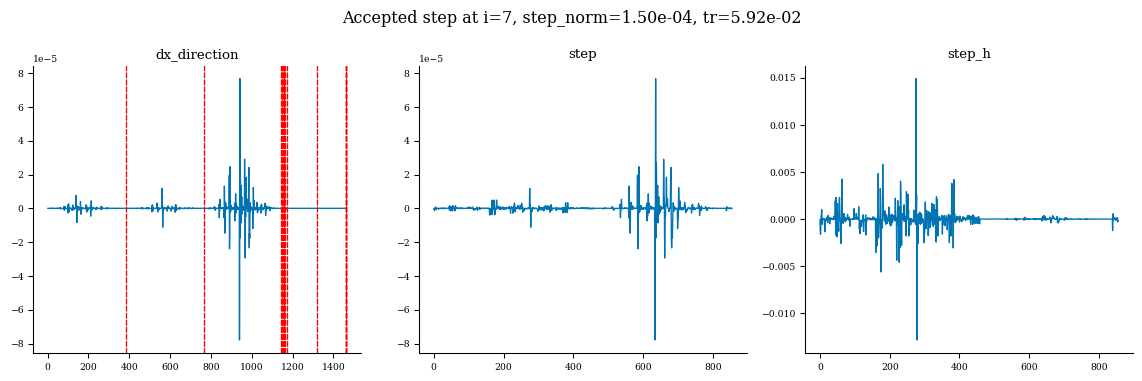

       7             13          1.048e-07      1.524e-09      1.496e-04      6.050e-05   


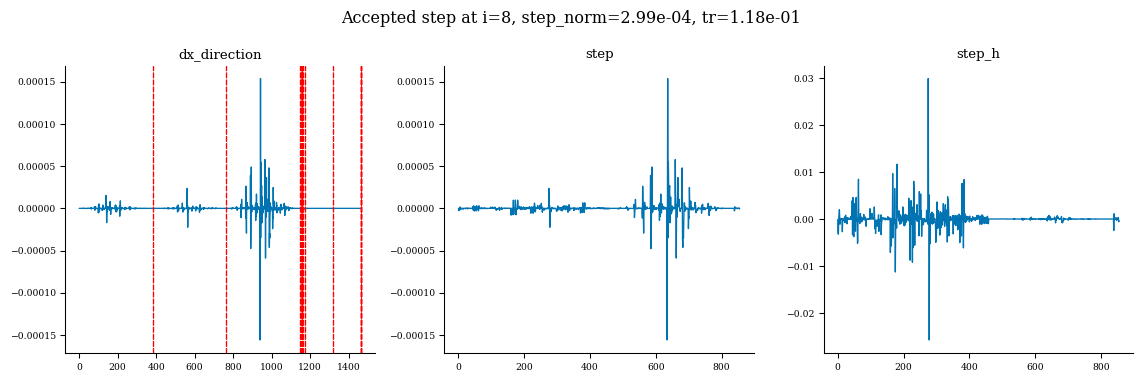

       8             14          1.018e-07      2.964e-09      2.988e-04      5.959e-05   


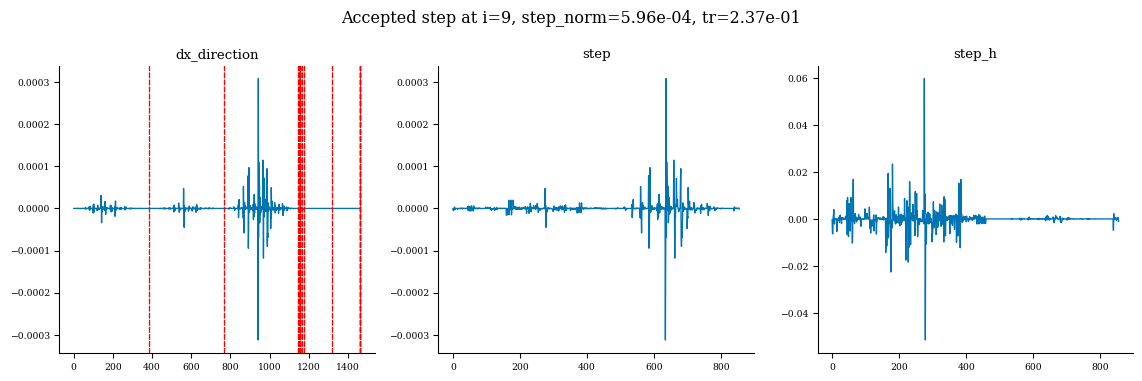

       9             15          9.622e-08      5.600e-09      5.959e-04      5.781e-05   


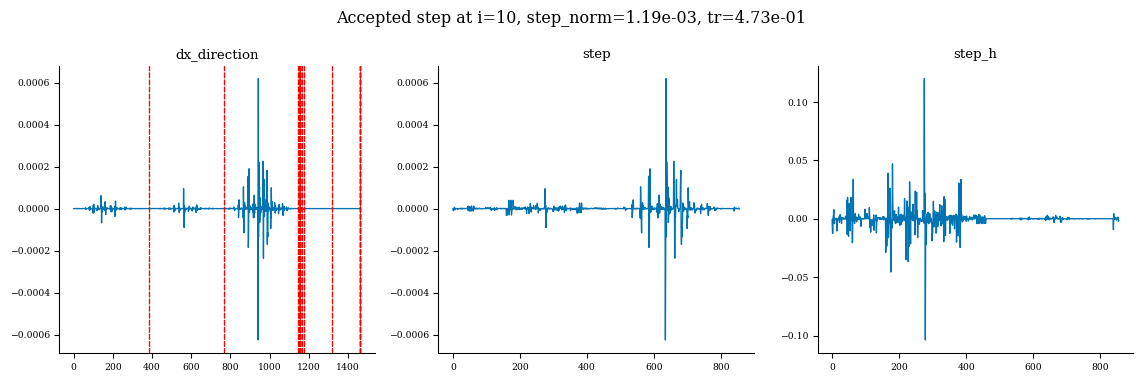

      10             16          8.629e-08      9.923e-09      1.185e-03      5.444e-05   
         Current function value: 8.629e-08
         Total delta_x: 3.980e-01
         Iterations: 10
         Function evaluations: 16
         Jacobian evaluations: 11
Timer: Solution time = 4.51 sec
Timer: Avg time per step = 410 ms
                                                                 Start  -->   End
Total (sum of squares):                                      3.882e+00  -->   8.629e-08, 
Maximum absolute Force error:                                9.021e+05  -->   2.573e+02 (N)
Minimum absolute Force error:                                2.656e+00  -->   5.268e-04 (N)
Average absolute Force error:                                3.550e+04  -->   5.818e+00 (N)
Maximum absolute Force error:                                8.273e-01  -->   2.360e-04 (normalized)
Minimum absolute Force error:                                2.436e-06  -->   4.831e-10 (normalized)
Average absolute Force e

In [8]:
eq = get("precise_QA")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    options={"objective": lcp, "eq": eq, "tr_method": "cho"},
)

# Some finite Beta (axis needs to shift)

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 91.8 ms
Timer: Objective build = 106 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 131 ms
Timer: LinearConstraintProjection build = 159 ms
Number of parameters: 1593
Number of objectives: 4940
Timer: Initializing the optimization = 519 ms

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : qr
Initial Trust Radius

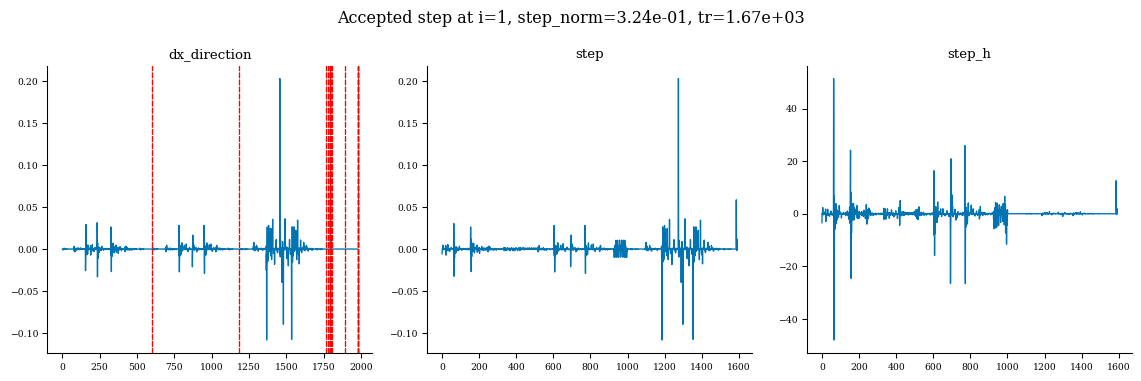

       1              2          1.147e-01      8.491e-01      3.236e-01      8.917e-02   


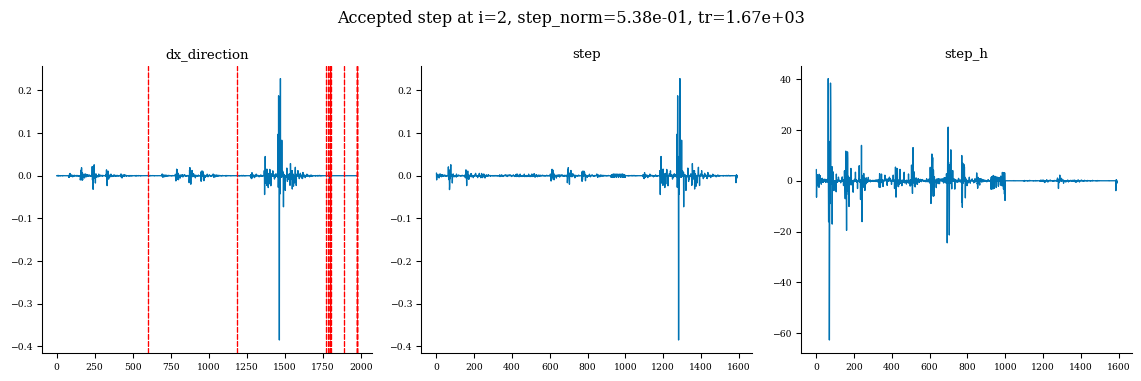

       2              3          6.013e-02      5.458e-02      5.380e-01      4.852e-02   


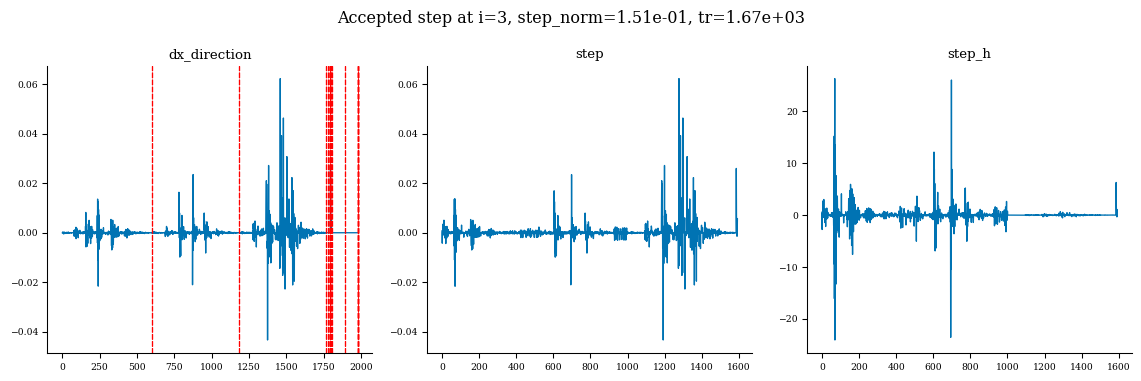

       3              4          6.824e-03      5.331e-02      1.514e-01      2.588e-02   


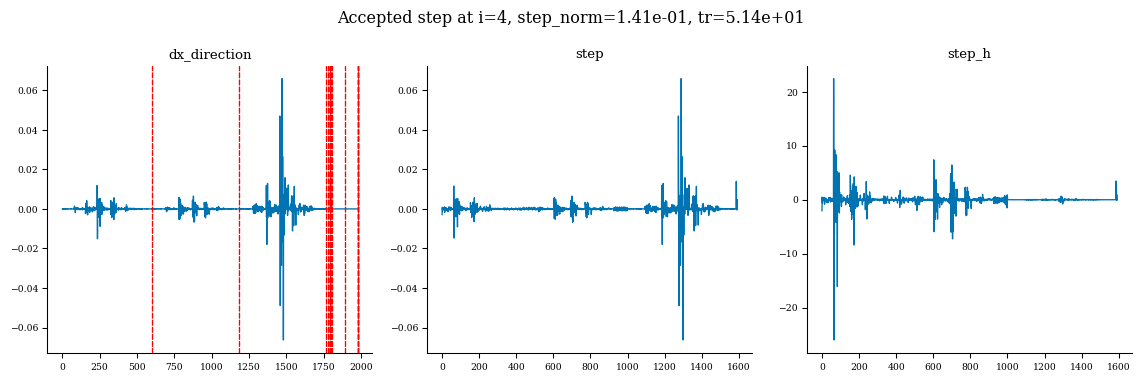

       4              6          1.834e-03      4.990e-03      1.412e-01      1.368e-02   


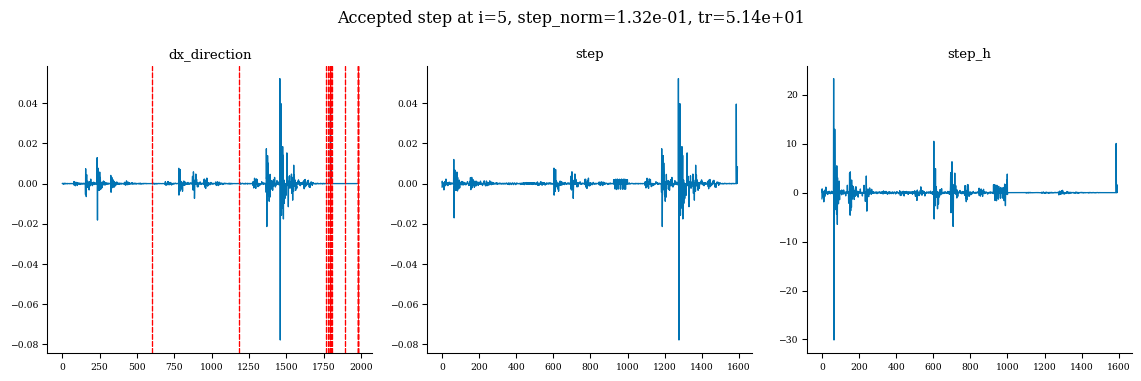

       5              7          1.169e-03      6.651e-04      1.316e-01      1.046e-02   


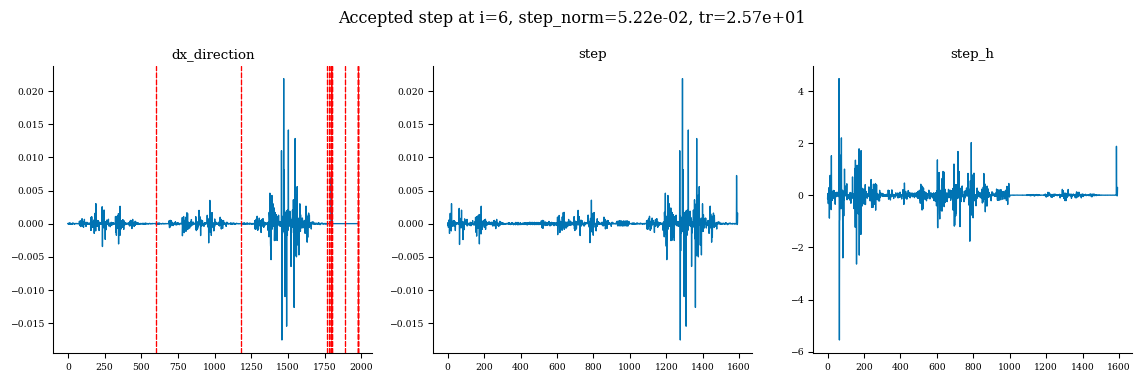

       6              9          5.395e-05      1.115e-03      5.220e-02      2.105e-03   


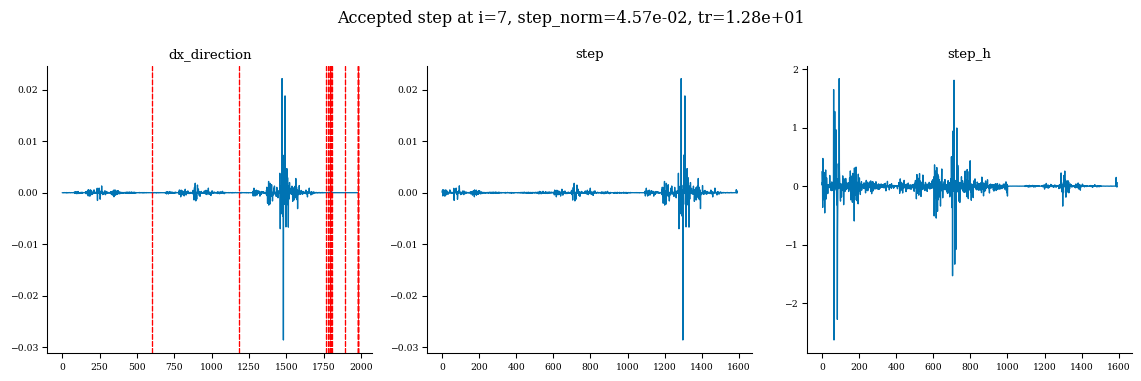

       7             11          9.791e-06      4.416e-05      4.575e-02      4.158e-04   


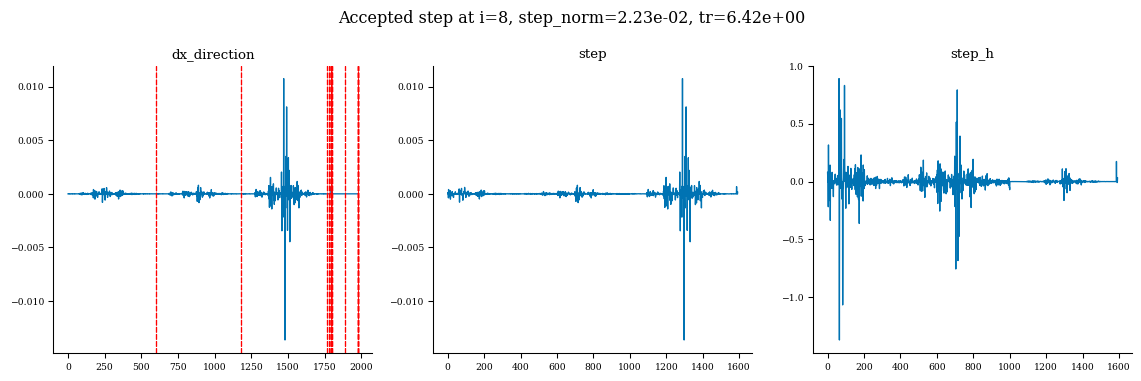

       8             13          5.674e-06      4.118e-06      2.225e-02      9.189e-05   


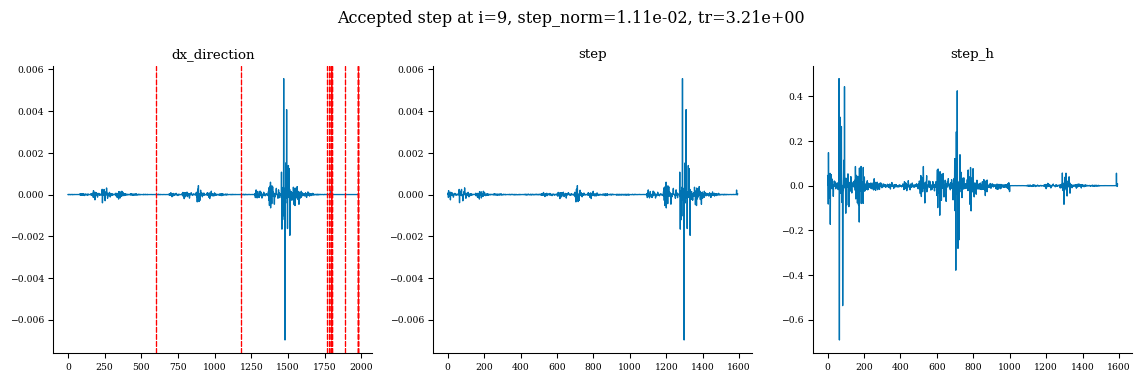

       9             15          5.290e-06      3.840e-07      1.109e-02      3.391e-05   


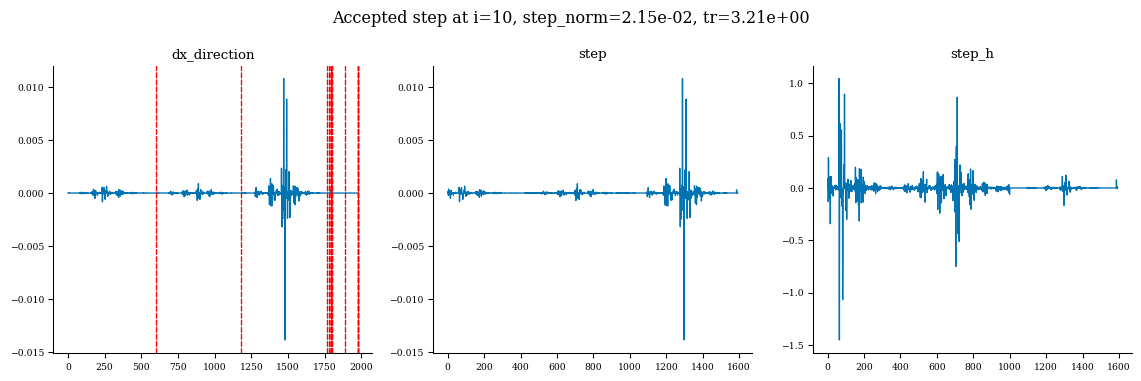

      10             16          5.193e-06      9.682e-08      2.145e-02      9.717e-05   
         Current function value: 5.193e-06
         Total delta_x: 7.377e-01
         Iterations: 10
         Function evaluations: 16
         Jacobian evaluations: 11
Timer: Solution time = 19.0 sec
Timer: Avg time per step = 1.73 sec
                                                                 Start  -->   End
Total (sum of squares):                                      9.639e-01  -->   5.193e-06, 
Maximum absolute Force error:                                1.651e+06  -->   5.551e+03 (N)
Minimum absolute Force error:                                6.072e+00  -->   2.094e-01 (N)
Average absolute Force error:                                2.452e+05  -->   4.404e+02 (N)
Maximum absolute Force error:                                1.328e-01  -->   4.464e-04 (normalized)
Minimum absolute Force error:                                4.883e-07  -->   1.684e-08 (normalized)
Average absolute Force

In [9]:
eq = get("HELIOTRON")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    options={"objective": lcp, "eq": eq, "tr_method": "qr"},
)

# Finite Beta with Cholesky

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 94.9 ms
Timer: Objective build = 105 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 146 ms
Timer: LinearConstraintProjection build = 196 ms
Number of parameters: 1593
Number of objectives: 4940
Timer: Initializing the optimization = 534 ms

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : cho
Initial Trust Radiu

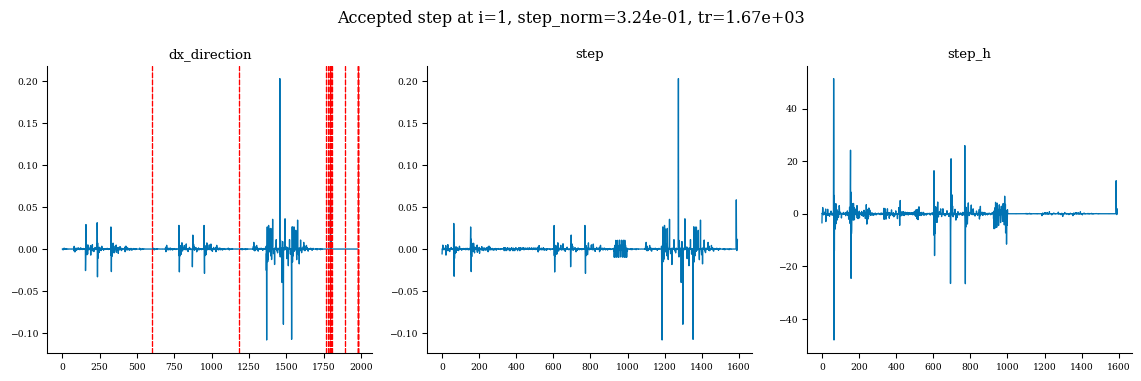

       1              2          1.147e-01      8.491e-01      3.236e-01      8.917e-02   


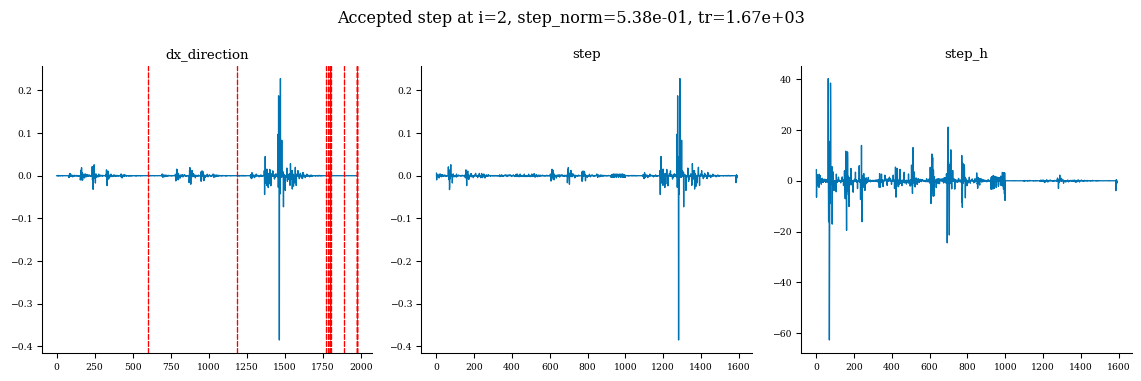

       2              3          6.013e-02      5.458e-02      5.380e-01      4.853e-02   


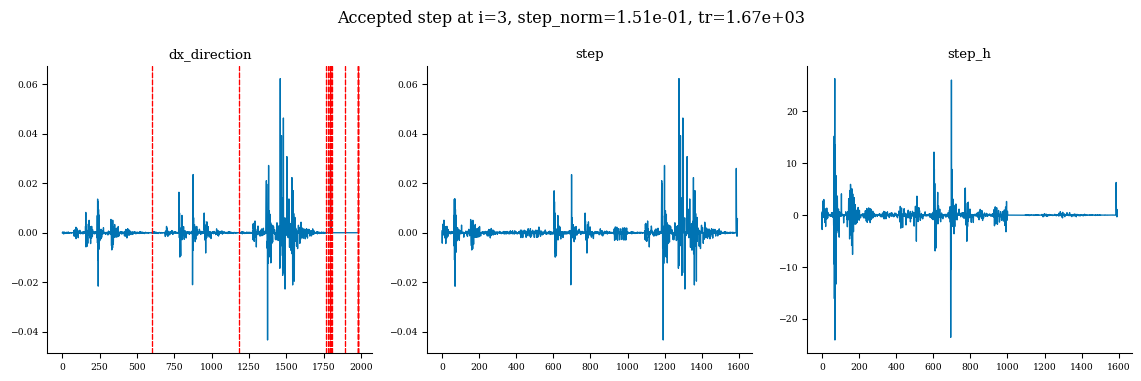

       3              4          6.823e-03      5.331e-02      1.514e-01      2.588e-02   


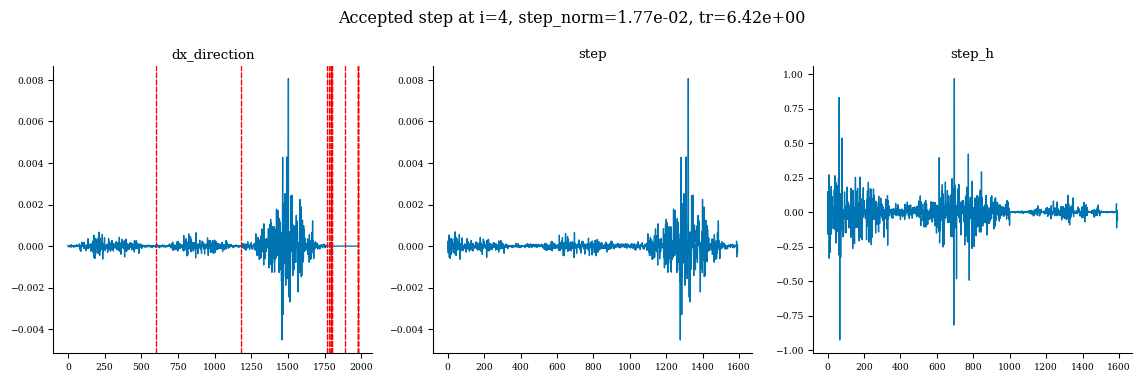

       4              8          1.663e-04      6.656e-03      1.768e-02      4.094e-03   


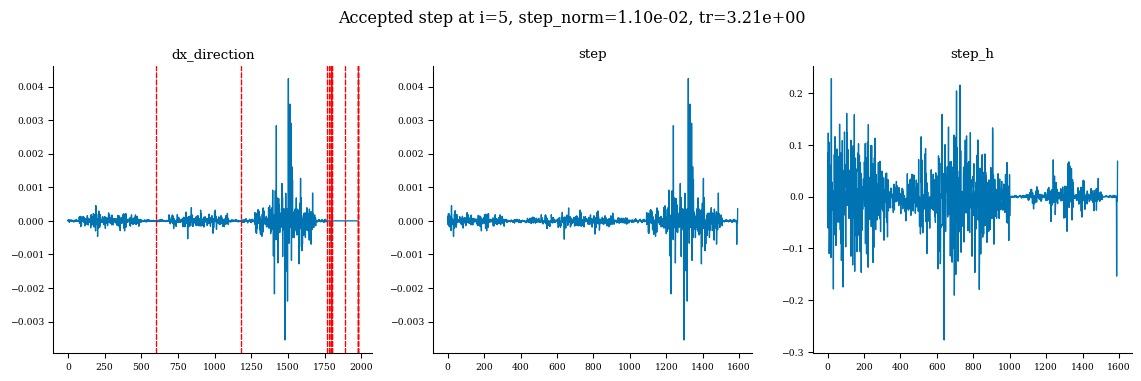

       5             10          9.377e-05      7.258e-05      1.098e-02      3.099e-03   


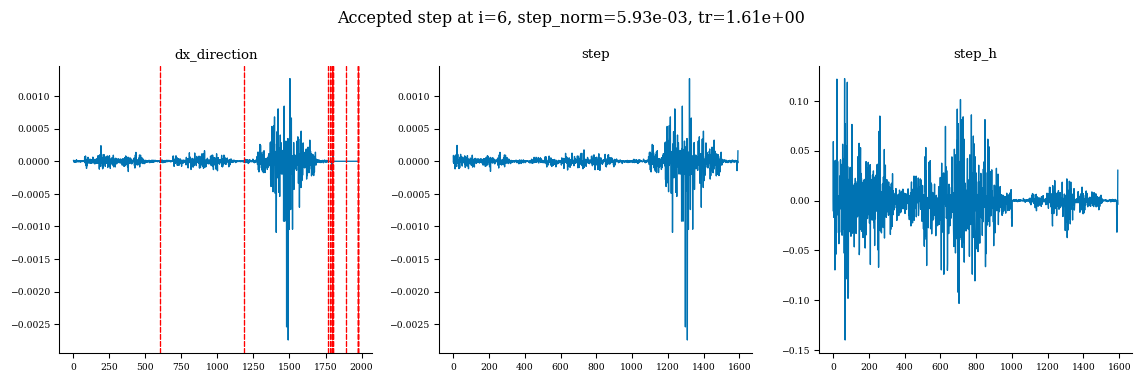

       6             12          5.719e-05      3.658e-05      5.929e-03      2.221e-03   


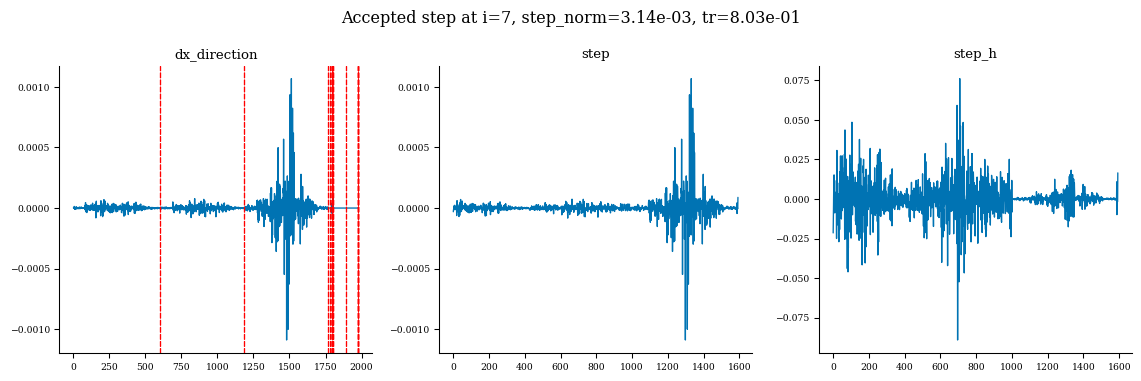

       7             14          3.473e-05      2.246e-05      3.144e-03      1.549e-03   


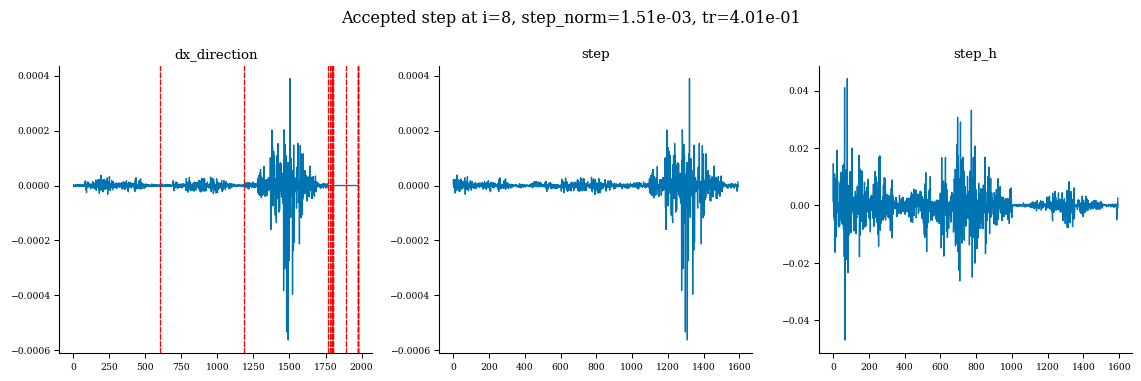

       8             16          1.916e-05      1.557e-05      1.512e-03      7.781e-04   


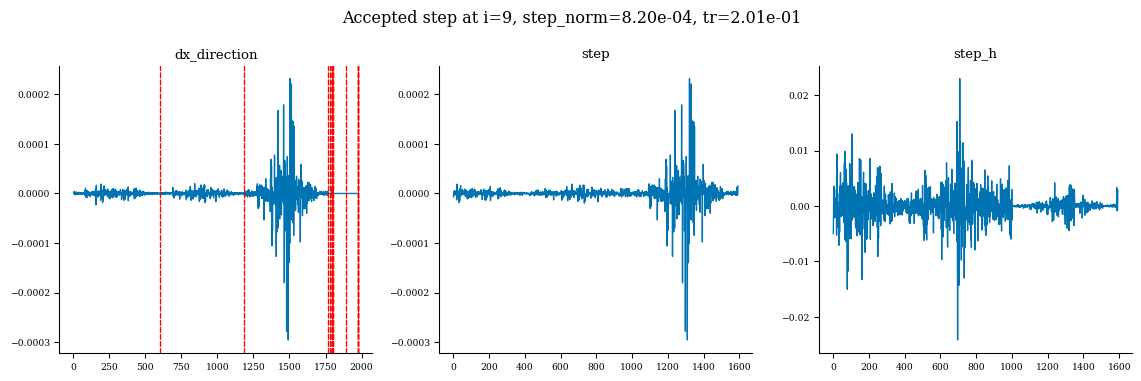

       9             18          1.579e-05      3.365e-06      8.202e-04      4.714e-04   


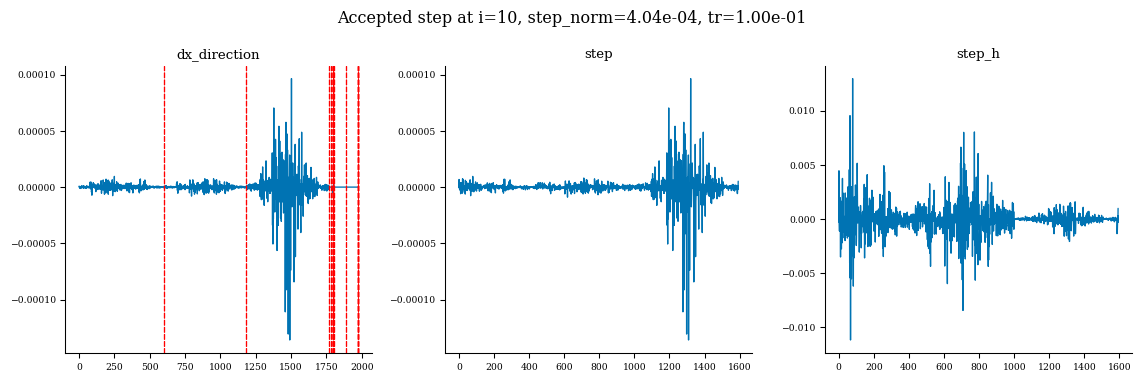

      10             20          1.446e-05      1.333e-06      4.036e-04      2.640e-04   
         Current function value: 1.446e-05
         Total delta_x: 6.454e-01
         Iterations: 10
         Function evaluations: 20
         Jacobian evaluations: 11
Timer: Solution time = 7.12 sec
Timer: Avg time per step = 647 ms
                                                                 Start  -->   End
Total (sum of squares):                                      9.639e-01  -->   1.446e-05, 
Maximum absolute Force error:                                1.651e+06  -->   1.031e+04 (N)
Minimum absolute Force error:                                6.072e+00  -->   2.939e-02 (N)
Average absolute Force error:                                2.452e+05  -->   8.083e+02 (N)
Maximum absolute Force error:                                1.328e-01  -->   8.295e-04 (normalized)
Minimum absolute Force error:                                4.883e-07  -->   2.364e-09 (normalized)
Average absolute Force e

In [10]:
eq = get("HELIOTRON")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    options={"objective": lcp, "eq": eq, "tr_method": "cho"},
)

# Finite Beta with SVD

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 89.7 ms
Timer: Objective build = 100 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 135 ms
Timer: LinearConstraintProjection build = 139 ms
Number of parameters: 1593
Number of objectives: 4940
Timer: Initializing the optimization = 406 ms

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : svd
Initial Trust Radiu

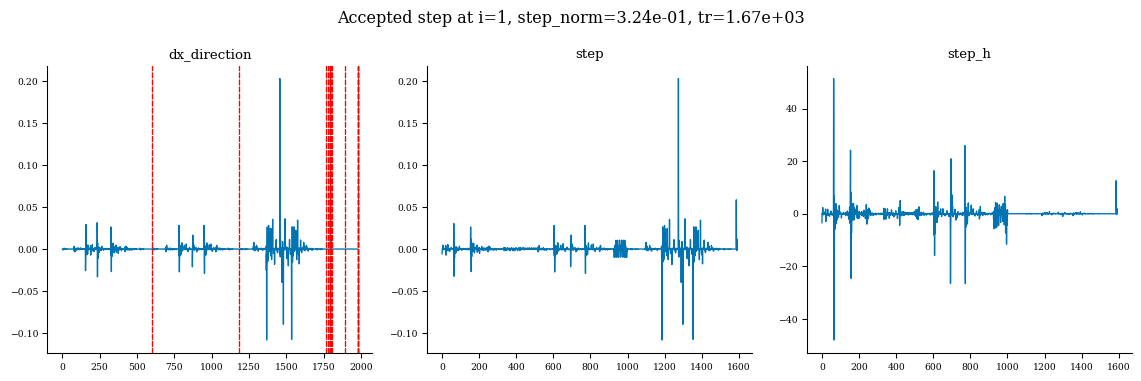

       1              2          1.147e-01      8.491e-01      3.236e-01      8.917e-02   


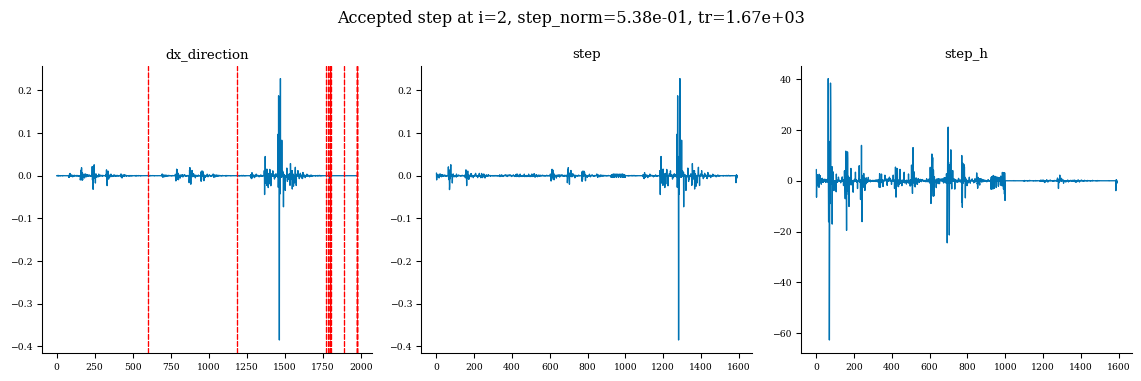

       2              3          6.013e-02      5.458e-02      5.380e-01      4.852e-02   


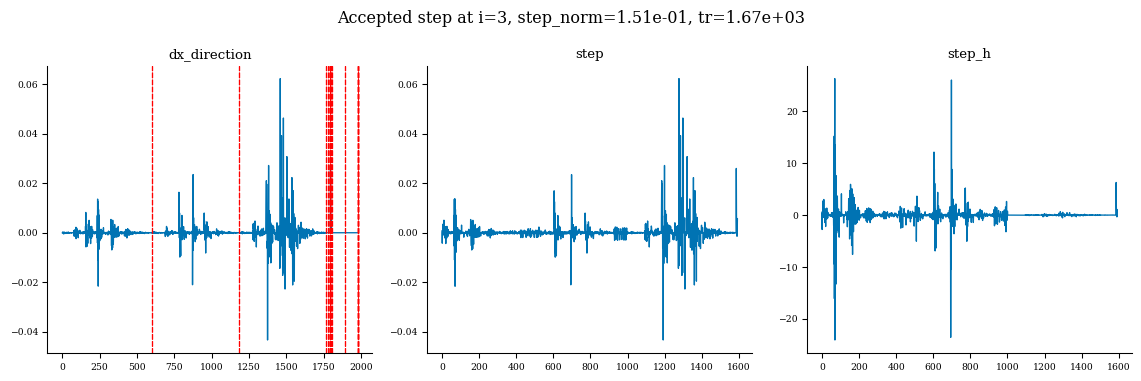

       3              4          6.824e-03      5.331e-02      1.514e-01      2.588e-02   


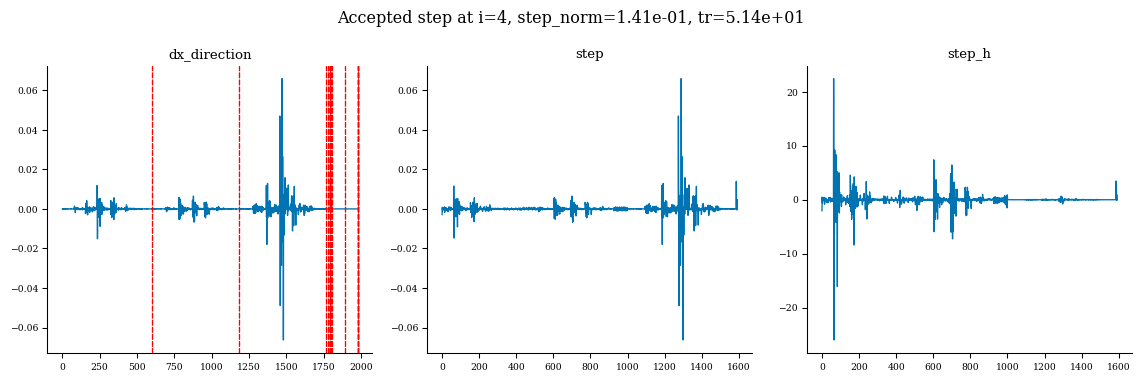

       4              6          1.834e-03      4.990e-03      1.412e-01      1.368e-02   


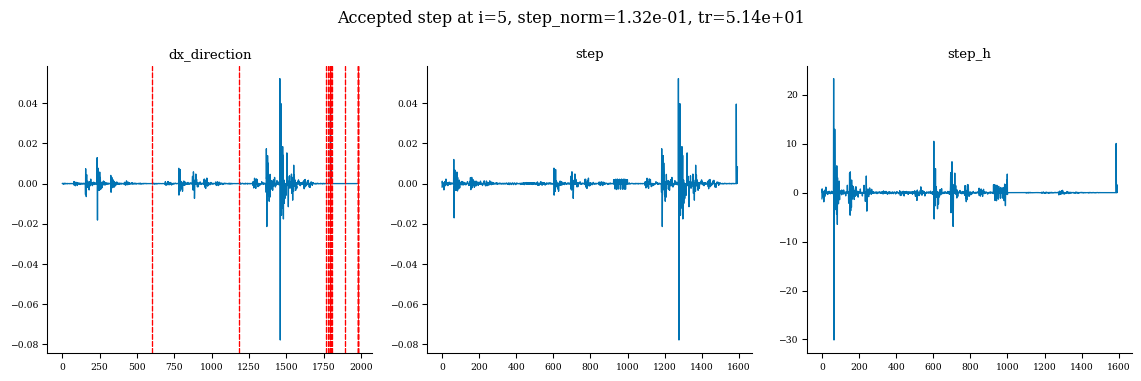

       5              7          1.169e-03      6.651e-04      1.316e-01      1.046e-02   


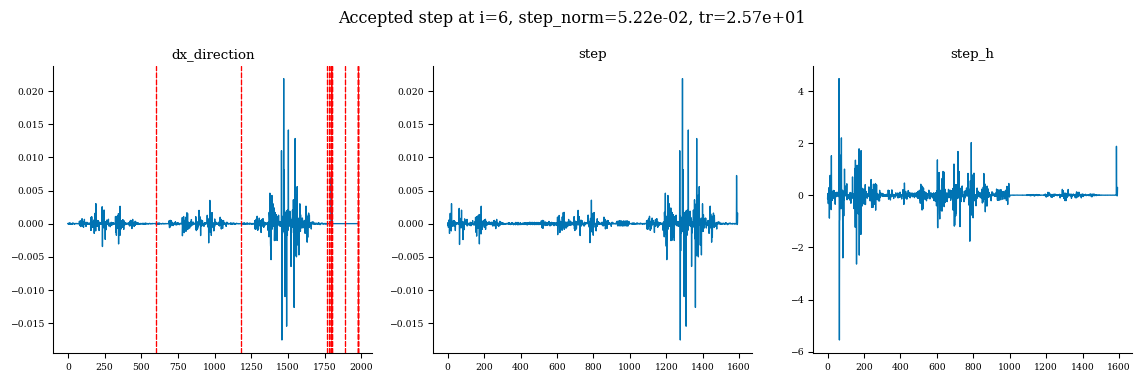

       6              9          5.395e-05      1.115e-03      5.220e-02      2.105e-03   


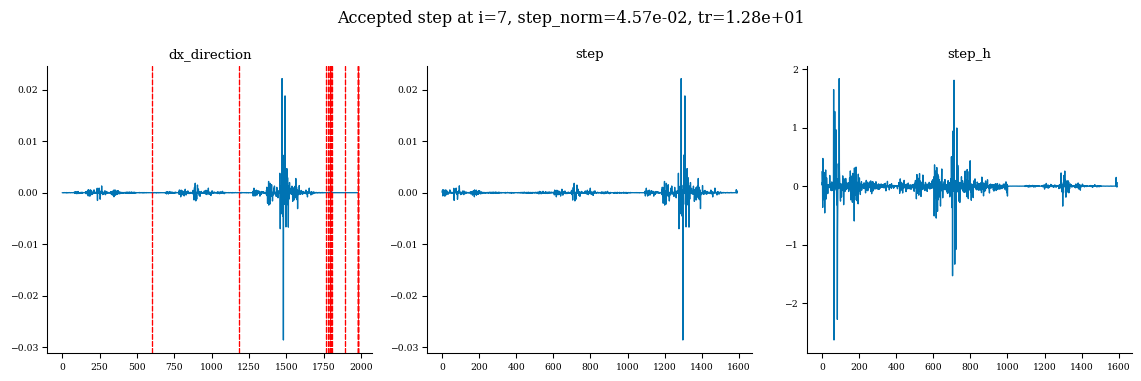

       7             11          9.791e-06      4.416e-05      4.575e-02      4.158e-04   


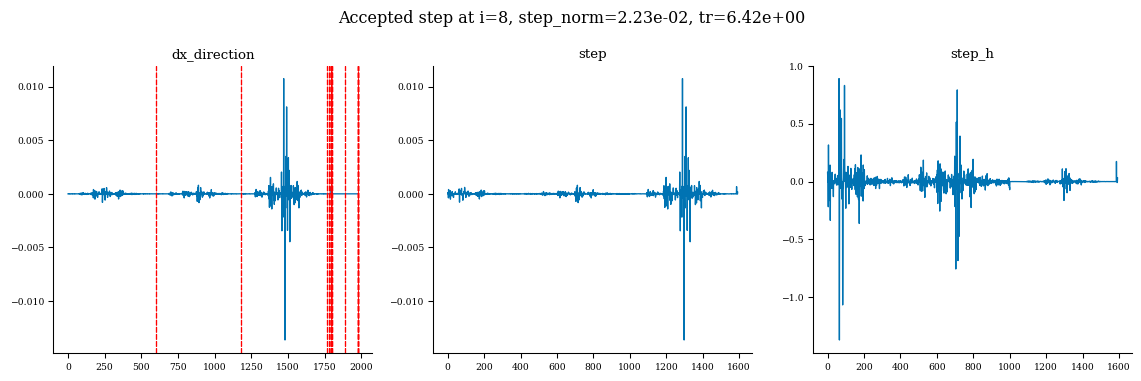

       8             13          5.674e-06      4.118e-06      2.225e-02      9.189e-05   


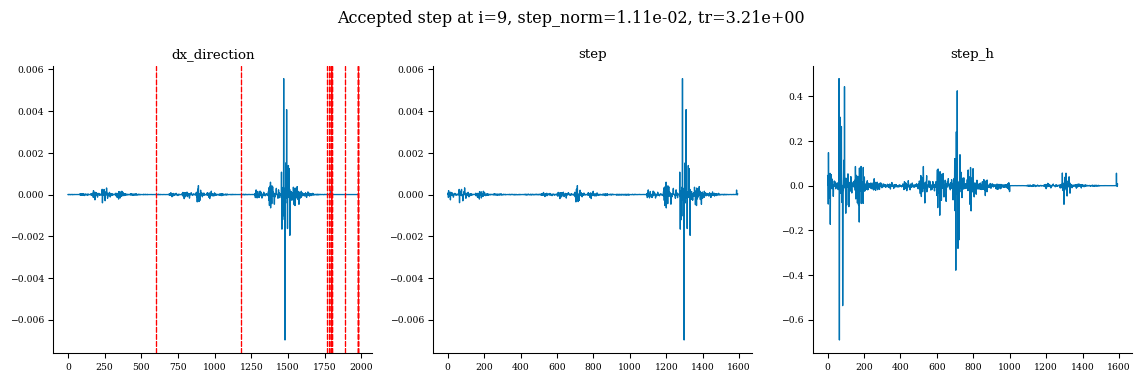

       9             15          5.290e-06      3.840e-07      1.109e-02      3.391e-05   


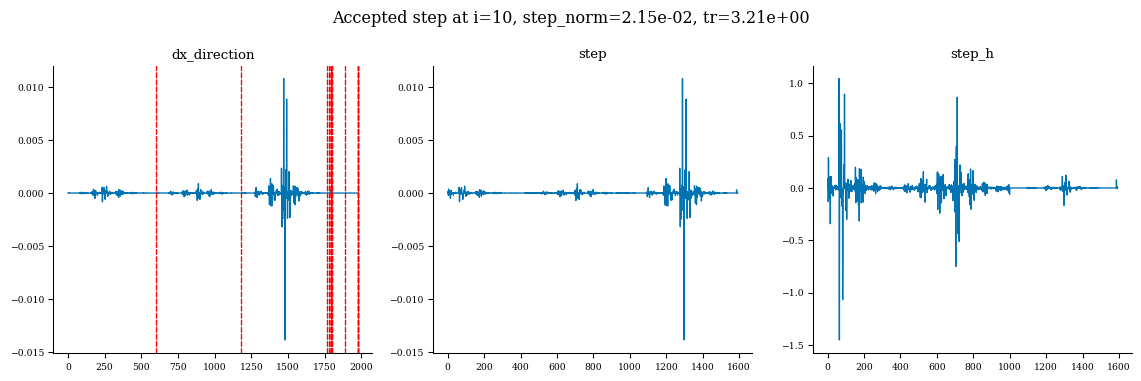

      10             16          5.193e-06      9.682e-08      2.145e-02      9.717e-05   
         Current function value: 5.193e-06
         Total delta_x: 7.377e-01
         Iterations: 10
         Function evaluations: 16
         Jacobian evaluations: 11
Timer: Solution time = 12.2 sec
Timer: Avg time per step = 1.11 sec
                                                                 Start  -->   End
Total (sum of squares):                                      9.639e-01  -->   5.193e-06, 
Maximum absolute Force error:                                1.651e+06  -->   5.551e+03 (N)
Minimum absolute Force error:                                6.072e+00  -->   2.094e-01 (N)
Average absolute Force error:                                2.452e+05  -->   4.404e+02 (N)
Maximum absolute Force error:                                1.328e-01  -->   4.464e-04 (normalized)
Minimum absolute Force error:                                4.883e-07  -->   1.684e-08 (normalized)
Average absolute Force

In [11]:
eq = get("HELIOTRON")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    options={"objective": lcp, "eq": eq, "tr_method": "svd"},
)

# Finite Beta with ESS

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 88.5 ms
Timer: Objective build = 98.8 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 132 ms
Timer: LinearConstraintProjection build = 2.04 sec
Number of parameters: 1593
Number of objectives: 4940
Timer: Initializing the optimization = 2.70 sec

Starting optimization
Using method: lsq-exact
Solver options:
------------------------------------------------------------
Maximum Function Evaluations       : 51
Maximum Allowed Total Δx Norm      : inf
Scaled Termination                 : True
Trust Region Method                : qr
Initial Trust R

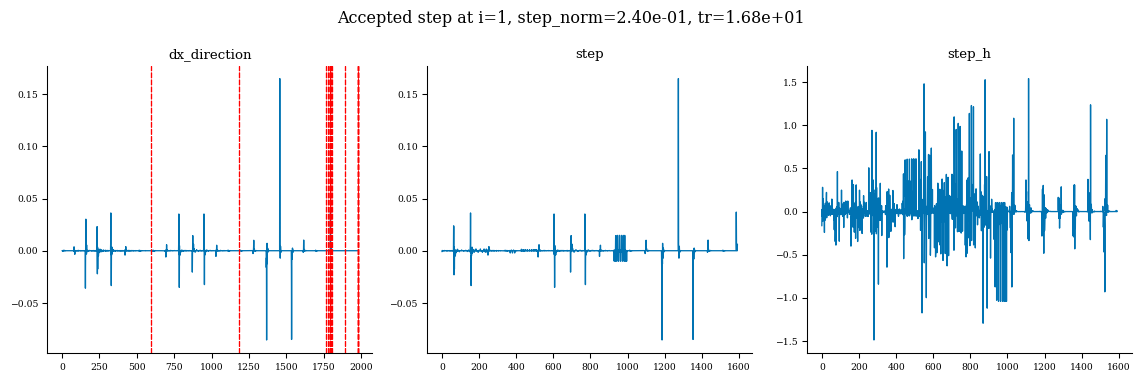

       1              2          7.051e-02      8.933e-01      2.396e-01      4.570e+01   


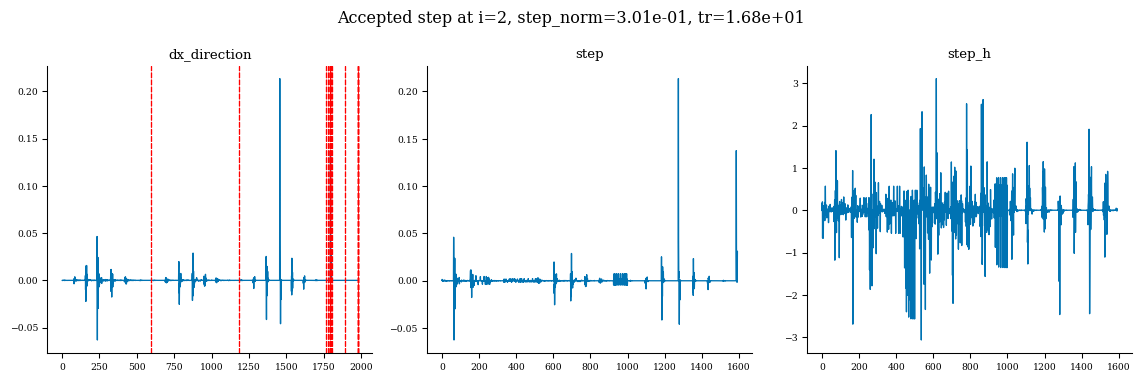

       2              3          2.205e-02      4.847e-02      3.008e-01      1.985e+01   


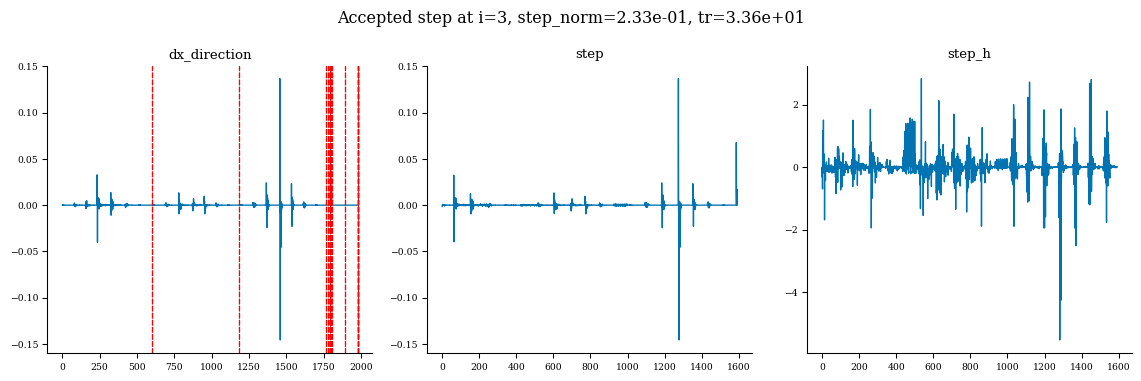

       3              4          1.630e-03      2.042e-02      2.331e-01      5.927e+00   


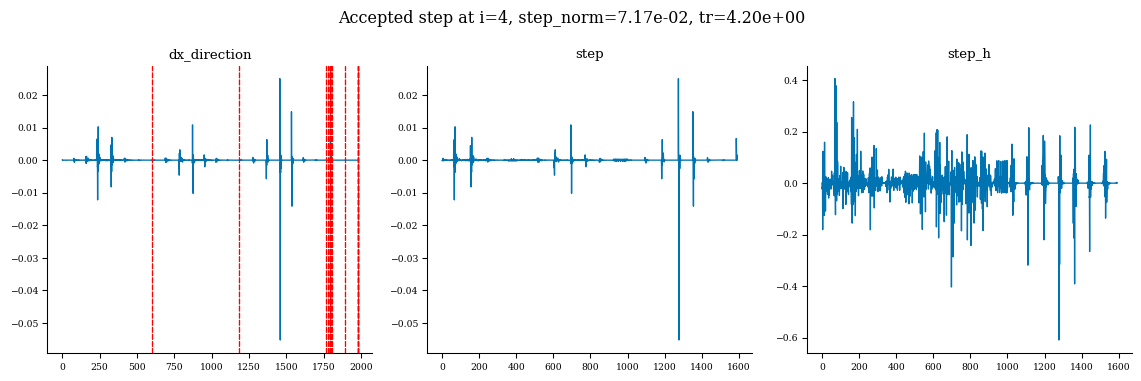

       4              7          3.115e-04      1.319e-03      7.167e-02      9.993e+00   


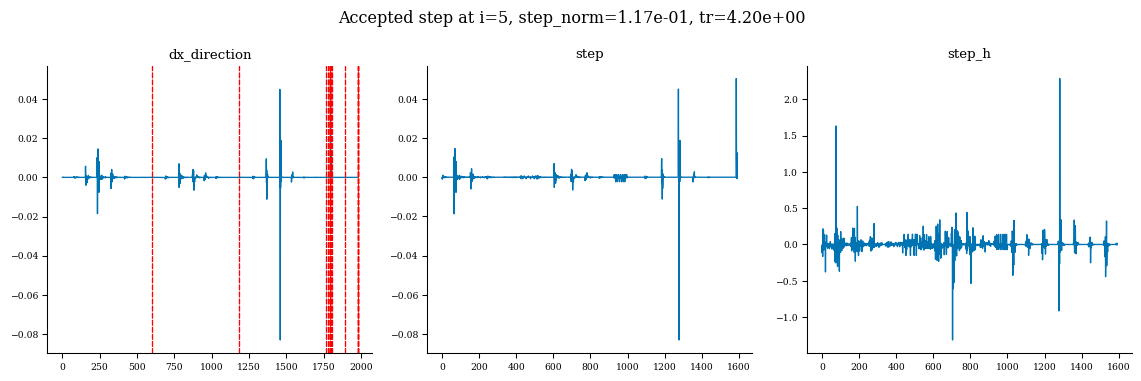

       5              8          1.827e-04      1.288e-04      1.172e-01      2.737e+00   


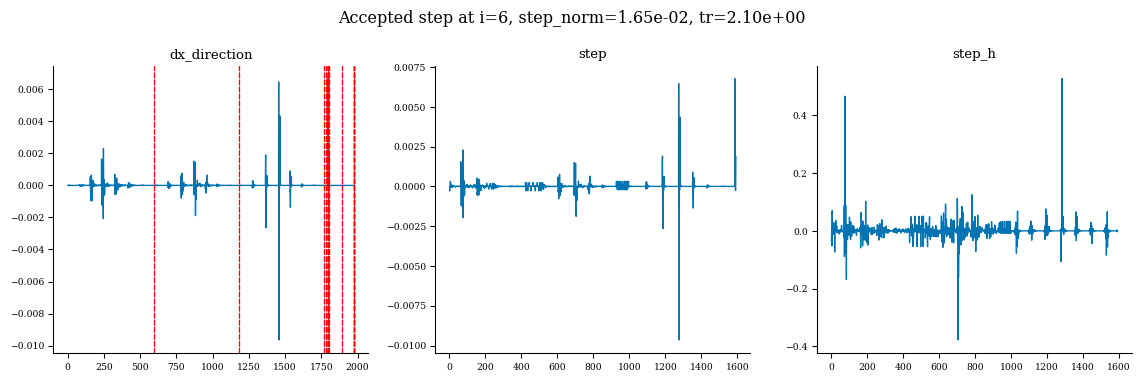

       6             10          3.983e-06      1.788e-04      1.646e-02      4.248e-01   


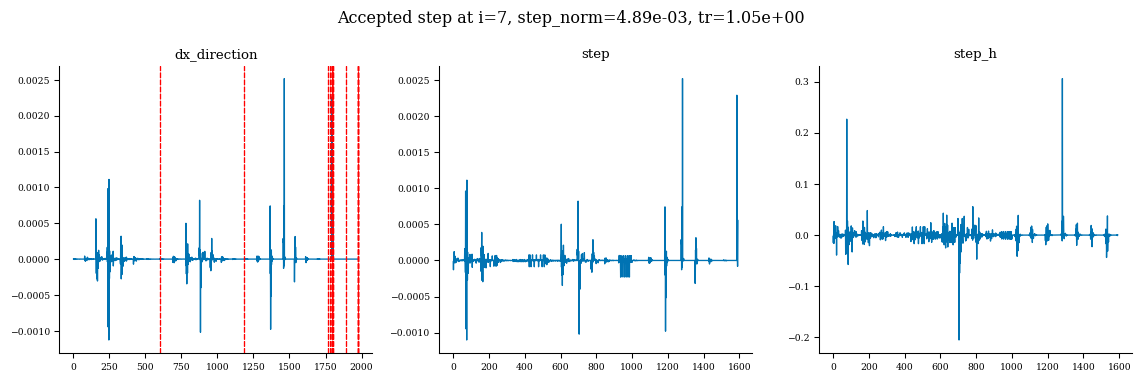

       7             12          2.794e-06      1.189e-06      4.893e-03      4.508e-02   


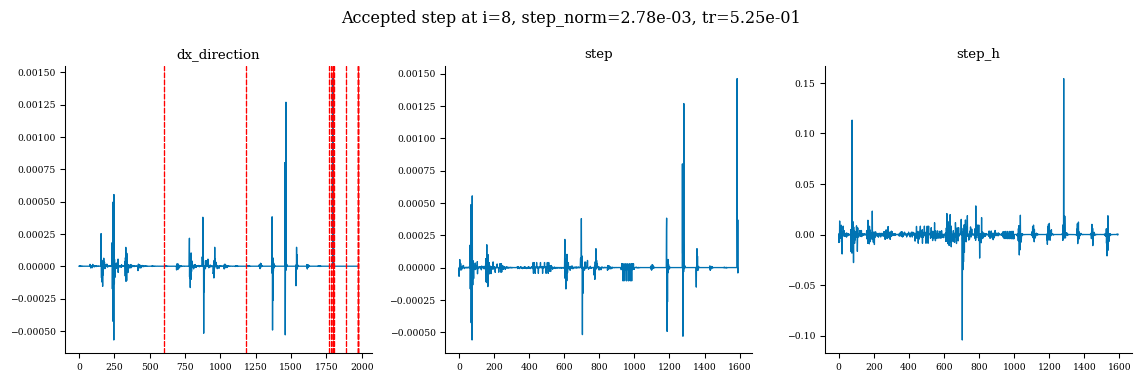

       8             14          2.687e-06      1.076e-07      2.781e-03      1.310e-02   


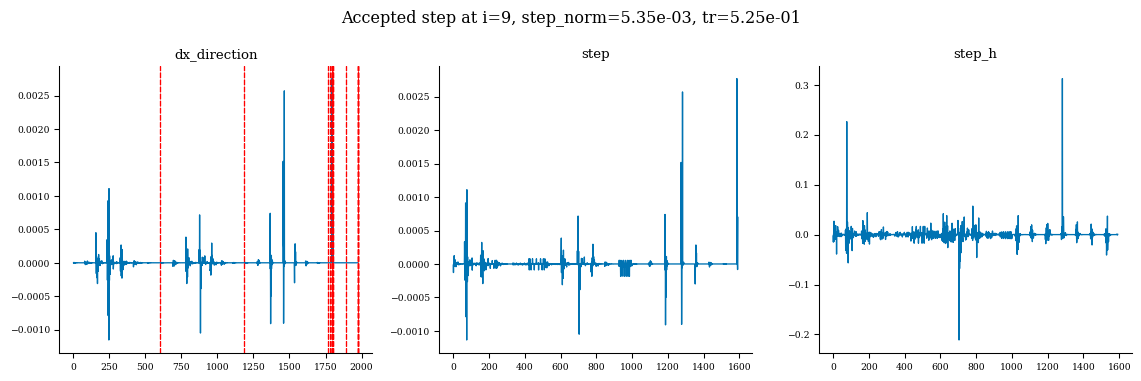

       9             15          2.596e-06      9.045e-08      5.354e-03      6.647e-02   


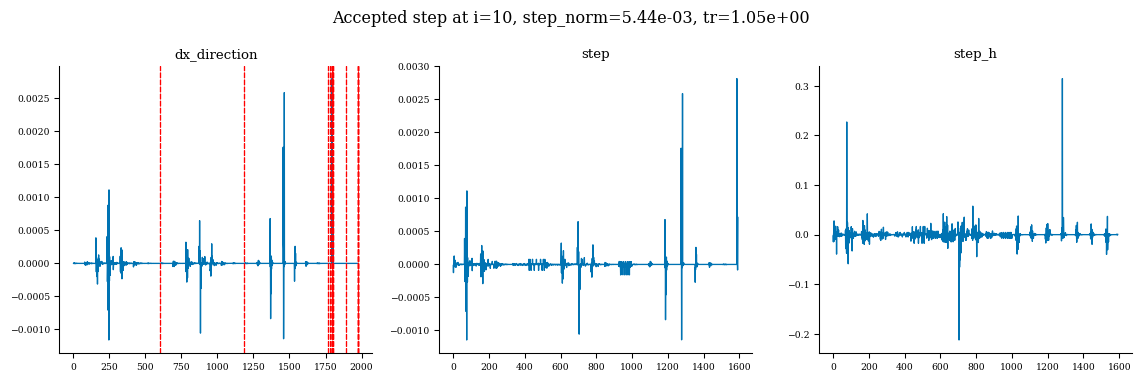

      10             16          2.470e-06      1.260e-07      5.440e-03      6.661e-02   
         Current function value: 2.470e-06
         Total delta_x: 7.999e-01
         Iterations: 10
         Function evaluations: 16
         Jacobian evaluations: 11
Timer: Solution time = 22.6 sec
Timer: Avg time per step = 2.06 sec
                                                                 Start  -->   End
Total (sum of squares):                                      9.639e-01  -->   2.470e-06, 
Maximum absolute Force error:                                1.651e+06  -->   1.176e+04 (N)
Minimum absolute Force error:                                6.072e+00  -->   2.317e-01 (N)
Average absolute Force error:                                2.452e+05  -->   3.657e+02 (N)
Maximum absolute Force error:                                1.328e-01  -->   9.454e-04 (normalized)
Minimum absolute Force error:                                4.883e-07  -->   1.864e-08 (normalized)
Average absolute Force

In [12]:
eq = get("HELIOTRON")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))
lcp = LinearConstraintProjection(obj, con)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    x_scale="ess",
    options={"objective": lcp, "eq": eq, "tr_method": "qr"},
)

# What does LCP x_scale do?

In [13]:
eq = get("HELIOTRON")
eq.axis = eq.surface.get_axis()
eq.set_initial_guess()
cons = get_fixed_boundary_constraints(eq)
cons = maybe_add_self_consistency(eq, cons)
con = ObjectiveFunction(cons)
obj = ObjectiveFunction(ForceBalance(eq))

lcp_scale = np.ones(eq.dim_x)
lcp_scale[eq.x_idx["L_lmn"]] *= 5 
lcp = LinearConstraintProjection(obj, con, x_scale=lcp_scale)
lcp.build(verbose=0)
eq, out = eq.solve(
    maxiter=10,
    verbose=3,
    ftol=1e-3,
    x_scale="ess",
    options={"objective": lcp, "eq": eq, "tr_method": "qr", "linear_constraint_options": {"x_scale": lcp_scale}},
)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()